# GPT 4.0-aided Analysis of 19th and 20th Century Russian and English Literature
## Introduction
Countless papers have been written comparing Russian and English Literature or Literature of the 19th and 20th century (for example, Emerson (2008)). The breadth and depth of literature of these regions and periods have been a centuries-long inspiration for research into literature as an artform, language, and culture in a broad sense, among other topics. As research topic, researchers can analyse anything from the use of a single word, the style of a single chapter, the psychological effects of a book to the societal impact captured in a collection of books.

However, one challenge with doing any type of analysis of literature is balancing personal interpretation, prone to subjectivity, and the objective analysis of a work, prone to oversimplification and tedious effort. On the one hand, one can write about one's own interpretation of a work, but such analysis is bound to conflict with another reader, taking a different angle when reading the book. On the other hand, objective analysis, using, for example, the occurence of specific words as a measure of analysis, is bound to miss the depths and complexities of a specific work. Moreover, such analysis used to be very time consuming. For example, a simple analysis of the occurences of characters in a story requires one to recognize and capture all the different names a character has throughout the book, to then count all occurences of each name of each character. 

LLMs can play an interesting role bringing both methods together, especially simplfying objective analysis of stories. In this study, I have used Bing AI, which uses GPT 4.0, to collect characters and gender of characters from a range of English and Russian (translated) books from the 19th and 20th century for the analysis of various objective metrics:

* Basic Statistics: 
    * Number of words
    * Dialogue vs. Non-dialogue Paragraphs
    * Number of characters (people)
    * Number of character interactions
    * Number of male vs. female characters
* Character Interactions Maps
* Lonely or Single-person Paragraphs
* (A variation on) the Bechdel-Wallace test

All these metrics can be used to draw broader conclusion about culture in respective regions or periods. Moreover, it enables the comparison of large numbers of literary works without the extensive and tedious capturing of metrics. While not qualified, as a literary expert, I will use these metrics to draw tentative conclusion based on the data and describe how they might indicate certain cultural or literary patterns.

In the rest of the document, to simplify understanding, I will combine the methods and result section for each metric (major bullet point in the list above). Finally, I will draw a brief conclusion about the use of this method for analyzing literary works.

## Basic Statistics

### Method: Book Selection

Before going through some initial simple statistics on the books, a note on book selection. Books have been selected on a convenience basis, based on books that had full text documents available. The following books have been selected. Books have been collected from: Kaggle (see Zhang (2020)), Project Gutenberg and Archive.org. 

| 19th Century Russian Books                 |                   20th Century Russian Books                  |            19th Century English Books           |         20th Century English Books         |
|:------------------------------------------:|:-------------------------------------------------------------:|:-----------------------------------------------:|:------------------------------------------:|
| Brother Karamazov - Fyodor Dostoevsky      | Mother - Maxim Gorky                                          | Picture of Dorian Gray - Oscar Wilde            | To Kill a Mockingbird - Harper Lee         |
| Crime and Punishment - Fyodor Dostoevsky   | A Day in the Life of Ivan Denisovich - Aleksandr Solzhenitsyn | Great Expectations - Charles Dickens            | 1984 - George Orwell                       |
| Notes from Underground - Fyodor Dostoevsky | Dr. Zhivago - Boris Pasternak                                 | Wuthering Heights - Emily Bronte                | A Brave New World - Aldous Huxley          |
| The Idiot - Fyodor Dostoevsky              | Heart of a Dog - Mikhail Bulgakov                             | Tale of Two Cities - Charles Dickens            | Handmaid's Tale - Margaret Atwood          |
| War and Peace - Leo Tolstoy                | Life and Fate - Vasily Grossman                               | War of the Worlds - H.G. Wells                  | Lord of the Flies - William Golding        |
| The Duel - Anton Checkov                   | Petersburg - Andrei Bely                                      | The Adventures of Huckleberry Finn - Mark Twain | Of Mice and Men - John Steinbeck           |
| Dead Souls - Nikolai Gogol                 | We - Yevgeny Zamyatin                                         | Scarlett Letter - Nathaniel Hawthorne           | Tender is the Night - F. Scott Fitzgerald  |
| Eugene Onegin - Alexander Pushkin          | The Master and Margerita - Mikhail Bulgakov                   | Moby Dick - Herman Melville                     | The Great Gatsby - F. Scott Fitzgerald     |
| Fathers and Sons - Ivan Turgenev           | The Life of Insects - Viktor Pelevin                          |                                                 | The Old Man and the Sea - Ernest Hemingway |


### Basic Statistic 1: Word Count per book
The first basic statistic that I will describe is the number of words in a book. For this, the digital version of each book is analyzed and full texts are converted to dictionaries capturing each paragraph and each sentence separately. For this exercise, these sentences are split into words. 

Based on popular conceptions, we expect here that Russian literature might on average be a bit longer than English literature, because Russian literature is often considered more wordy and slow than English literature. Secondly, we expect a decrease in the number of words over the two time periods. As with every form of entertainment, we also expect here to see a trend toward shorter small-form books, instead of lengthy books. 

The following code block describes the dictionaries used to differentiate and load books from their sources and loads the Kaggle Database used to retrieve many books (those with an index in the dictionary).


In [7]:
# 19th Century Russian Books
russian_19th_century_ids = {
    "Brothers Karamazov": 707, 
    "War and Peace" : 1064,
    "Crime and Punishment" : 147,
    "Dead Souls": 154, 
    "Notes from the Underground": 408 
                            }
russian_19th_century_files = {
    "The Duel": "theduel.txt", 
    "Eugene Onegin": "eugeneonegin.txt", 
    "Fathers and Sons": "fathersandsons.txt", 
    "The Idiot": "theidiot.txt"
}

# 20th Century Russian Books
russian_20th_century_files = {
    "Mother": "mother.txt",
    "A Day in the Life of Ivan Denisovich" : "dayinthelife.txt", 
    "Dr. Zhivago" : "drzhivago.txt", 
    "Heart of a Dog": "heartofadog.txt", 
    "Life and Fate": "lifeandfate.txt", 
    "Petersburg": "petersburg.txt", 
    "We": "we.txt", 
    "The Master and Margarita" : "themasterandmargarita.txt", 
}
russian_20th_century_files_no_newlines = {
    "The Life of Insects" : "thelifeofinsects.txt"
}

# 19th Century English Books
english_19th_century_ids_html = {
    "Picture of Dorian Gray" : 885,  
    "Great Expectations": 222, 
    "Wuthering Heights": 1084, 
    "Tale of Two Cities": 40, 
    "War of the Worlds": 1066,  
    "The Adventures Of Huckleberry Finn": 666 
}
english_19th_century_ids_lines = {
    "Scarlet Letter": 927, 
    "Moby Dick": 372 
}

# 20th Century English Books
english_20th_century_ids = {
    "Ulysses": 1046 
}
english_20th_century_files = {
    "To Kill a Mockingbird": "tokillamockingbird.txt", 
    "1984" : "1984.txt", 
    "A Brave New World" : "bravenewworld.txt", 
    "Fahrenheit 451": "fahrenheit451.txt",
    "Handmaid's Tale": "handmaidstale.txt",
    "Lord of the Flies": "lordoftheflies.txt",
    "Of Mice and Men" : "ofmiceandmen.txt",
    "Tender is the Night": "tenderisthenight.txt",
    "The Great Gatsby" : "thegreatgatsby.txt"
}

In [8]:
# Load Database

import numpy as np
import pandas as pd
from sqlalchemy import create_engine as ce
from sqlalchemy import inspect
from pathlib import Path

DATA= Path("db/books.db")
engine = ce("sqlite:///"+str(DATA))
inspector = inspect(engine)

books_df = pd.read_sql("books", con = engine)
author_df = pd.read_sql("authors", con = engine)
book_file_df = pd.read_sql("book_file", con = engine)
text_files_df = pd.read_sql("text_files", con = engine)

For the next step, I will describe the functions that take the full text books and turns them into paragraphs and sentence dictionaries. Note that, depending on the formatting of the book, slight variations are required for this. I have disected one function to describe the overall approach, other functions are variations on the example, creating the same result, but based on different input formatting. 

After these functions have been created, we can use the functions to create all the required dictionaries.

In [9]:
from itertools import *
import re
from bs4 import BeautifulSoup

# Support function that removes any excessive new line characters. 
# This allows sentences that run over multiple lines to be split at a '.', not at the end of each line. 
def removeSpacesAndNewLines(paragraph):
    return " ".join(paragraph.split())

# This (briefly) changes all '?' and '!' into '.' to enable consistent identification of the end of sentences.
def allPeriodEndings(line):
    return line.replace('?','.',).replace('!', '.')

# Takes the file name of a text file of a book, opens it and transforms it in a paragraph and sentence dictionary.
def getBookDictionaryText(text_file):
    # Open the file
    file = open("db/txts/" + text_file, "r", encoding="utf8")
    book_dict = {}
    paragraph_index = 0
    # Split the book into paragraphs, where a double new line indicates a new paragraph.
    paragraphs = (file.read().split("\n\n"))
    for paragraph in paragraphs:
        lines = {}
        # Split each paragraph into sentences, splitting at every '.'; before splitting the sentences, any new
        # lines, '?' or '!' are removed from each sentence. 
        for line_index, line in enumerate(allPeriodEndings(removeSpacesAndNewLines(paragraph)).split(".")):
            if line != "":    
                # Create a dictionary for each paragraph with all the sentences and a corresponding sentence index
                lines[line_index] = line
        # Create the dictionary for each book, with the sentence dictionary for each paragraph and a paragraph index
        book_dict[paragraph_index] = lines
        paragraph_index += 1
    return book_dict

# Also transform full text books from files into dictionaries, but now using a single new line with 
# a sentence ending as a paragraph-ending indicator.
def getBookDictionaryTextNoNL(text_file):
    file = open("db/txts/" + text_file, "r", encoding="utf8")
    book_dict = {}
    paragraph_index = 0
    paragraphs = re.split("'\n|.\n", allPeriodEndings(file.read()))
    for paragraph in paragraphs:
        lines = {}
        for line_index, line in enumerate(allPeriodEndings(removeSpacesAndNewLines(paragraph)).split(".")):
            if line != "":    
                lines[line_index] = line
        book_dict[paragraph_index] = lines
        paragraph_index += 1
    return book_dict

# For books that come from the Kaggle database, the full text first needs to be selected from the DB
def getTextByBookID(id):
    text_file_dict = {}
    book_files = book_file_df[book_file_df.book_id == id].file_id
    text_file_list = text_files_df[text_files_df.index.isin(book_files)]
    return text_file_list

# Transform book from DB into the dictionary format. 
# These books have a double space indent at the start of a paragraph.
def getBookDictionarySpaces(text_files):
    book_dict = {}
    paragraph_index = 0
    for text_file_index, text_file in text_files.iterrows():
        paragraphs = (text_file.text.split("\n\n\n\n  "))
        for paragraph in paragraphs:
            lines = {}
            for line_index, line in enumerate(allPeriodEndings(removeSpacesAndNewLines(paragraph)).split(".")):
                if line != "":    
                    lines[line_index] = line
            book_dict[paragraph_index] = lines
            paragraph_index += 1
    return book_dict

# Transform book from DB in into the dictionary.
# For books that are formatted with 5 (or more) new lines to indicate a new paragraph.
def getBookDictionary5Lines(text_files):
    book_dict = {}
    paragraph_index = 0
    for text_file_index, text_file in text_files.iterrows():
        paragraphs = (text_file.text.split("\n\n\n\n\n"))
        for paragraph in paragraphs:
            lines = {}
            for line_index, line in enumerate(allPeriodEndings(removeSpacesAndNewLines(paragraph)).split(".")):
                if line != "":    
                    lines[line_index] = line
            book_dict[paragraph_index] = lines
            paragraph_index += 1
    return book_dict

# Transform book from DB in HTML format into the dictionary.
# Function uses "Beautiful Soup" Package to transform HTML into full text
def getBookDictionaryHTML(text_files):
    book_dict = {}
    paragraph_index = 0
    for text_file_index, text_file in text_files.iterrows():
        html = BeautifulSoup(text_file.text)
        paragraphs = (html.get_text().split("\n\n\n\n"))
        for paragraph in paragraphs:
            lines = {}
            for line_index, line in enumerate(allPeriodEndings(removeSpacesAndNewLines(paragraph)).split(".")):
                if line != "":    
                    lines[line_index] = line
            book_dict[paragraph_index] = lines
            paragraph_index += 1
    return book_dict

In [10]:
# Transform all book full texts into the book dictionaries, captured in dictionaries 
# for each region + period group. 
russian_19th_century_books_dict = {}

# Get books from DB
# Books using double-spaced new paragraph indents
russian_19th_century_books_dict["Crime and Punishment"] = getBookDictionarySpaces(getTextByBookID(russian_19th_century_ids["Crime and Punishment"]))
russian_19th_century_books_dict["War and Peace"] = getBookDictionarySpaces(getTextByBookID(russian_19th_century_ids["War and Peace"]))
russian_19th_century_books_dict["Brothers Karamazov"] = getBookDictionarySpaces(getTextByBookID(russian_19th_century_ids["Brothers Karamazov"]))

# Books using 5 new line paragraph gaps
russian_19th_century_books_dict["Dead Souls"] = getBookDictionary5Lines(getTextByBookID(russian_19th_century_ids["Dead Souls"]))
russian_19th_century_books_dict["Notes from the Underground"] = getBookDictionary5Lines(getTextByBookID(russian_19th_century_ids["Notes from the Underground"]))

# Get books from Texts
russian_19th_century_books_dict["The Duel"] = getBookDictionaryText(russian_19th_century_files["The Duel"])
russian_19th_century_books_dict["Eugene Onegin"] = getBookDictionaryText(russian_19th_century_files["Eugene Onegin"])
russian_19th_century_books_dict["Fathers and Sons"] = getBookDictionaryText(russian_19th_century_files["Fathers and Sons"])
russian_19th_century_books_dict["The Idiot"] = getBookDictionaryText(russian_19th_century_files["The Idiot"]) #Werkt nog niet

russian_20th_century_books_dict = {}
# Books from text using normal formatting
for name, file_name in russian_20th_century_files.items():
    russian_20th_century_books_dict[name] = getBookDictionaryText(file_name)
# Books from text without normal new line characters
for name, file_name in russian_20th_century_files_no_newlines.items():
    russian_20th_century_books_dict[name] = getBookDictionaryTextNoNL(file_name)

#English
english_19th_century_books_dict = {}
# Books from DB classic formatting
for name, id in english_19th_century_ids_lines.items():
    english_19th_century_books_dict[name] = getBookDictionarySpaces(getTextByBookID(english_19th_century_ids_lines[name]))
# Books from DB using HTML formattinb
for name, id in english_19th_century_ids_html.items():
    english_19th_century_books_dict[name] = getBookDictionaryHTML(getTextByBookID(english_19th_century_ids_html[name]))

english_20th_century_books_dict = {}
# Books from full text using classic formatting
for name, file_name in english_20th_century_files.items():
    english_20th_century_books_dict[name] = getBookDictionaryText(file_name)

Now that all book dictionaries have been created. We can run the statistics to see the various book length and compare regions and periods. 

First I will introduce a function to create boxplot visuals, then I will first look at all four groups of books split. 

In [11]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Create a Boxplot using MatPlotLib
# Takes the data (use list of list for multiple box plots) and labels and title as input
def createBoxPlot(data, labels, xlabel, ylabel, title):
    # Create a box plot
    plt.boxplot(data, labels=labels)

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Show the plot
    plt.show()

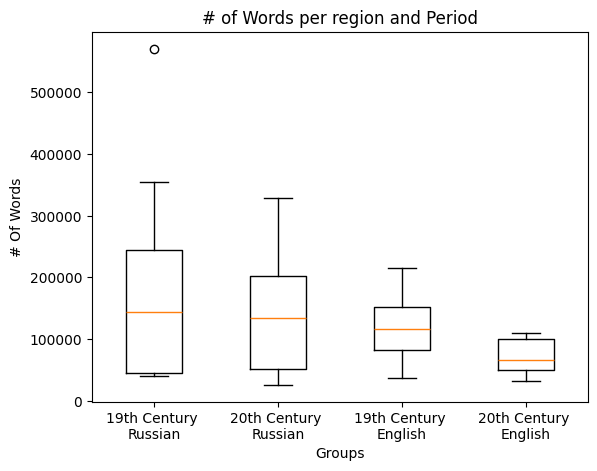

In [12]:
# Function to count the number of words in a book, based on a book dictionary using the paragraph - sentence dicts 
def getNumberOfWords(book_dict):
    words = 0
    for par_index, paragraph in book_dict.items():
        character_paragraph_list = []
        for line_index, line in paragraph.items():
            for word in line.split():
                words += 1
    return words

# Create a array to capture the word count for each group of books
word_count_list = [[],[],[],[]]
# Create labels and titles for the graph
labels = ['19th Century Russian','20th Century Russian','19th Century English','20th Century English']
graph_labels = ['19th Century \nRussian','20th Century \nRussian','19th Century \nEnglish','20th Century \nEnglish']
word_count_list_xlabel = "Groups"
word_count_list_ylabel = '# Of Words'
word_count_list_title = '# of Words per region and Period'

# For each group of books, iterate through each book, take the word count and add it to the book_word_count  
# dictionary for that respective group.
for name, book in russian_19th_century_books_dict.items():
    word_count_list[0].append(getNumberOfWords(book))
for name, book in russian_20th_century_books_dict.items():
    word_count_list[1].append(getNumberOfWords(book))
for name, book in english_19th_century_books_dict.items():
    word_count_list[2].append(getNumberOfWords(book))
for name, book in english_20th_century_books_dict.items():
    word_count_list[3].append(getNumberOfWords(book))

createBoxPlot(word_count_list, graph_labels, word_count_list_xlabel, word_count_list_ylabel, word_count_list_title)



Looking in more detail we can see 2 clear trends, the first is: Russian literature is longer than English literature. The second is that in both regions, the length has decreased over time. Both trends would fit popular conceptions of both the regions and the periods, but especially for the regions, the difference is not at all as large as you might expect.

Next, I will run some stats to validate this.

In [13]:
from scipy.stats import f_oneway
# Run the Anova test to validate if there is significant difference.
statistic, p_value = f_oneway(word_count_list[0], word_count_list[1], word_count_list[2], word_count_list[3])
print(statistic)
print("P-Value = " + str(p_value))

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the 4 groups")
else:
    print("Fail to reject the null hypothesis. No significant difference detected between the 4 groups.")

1.7631971747964352
P-Value = 0.17470850921792644
Fail to reject the null hypothesis. No significant difference detected between the 4 groups.


As we can see, there's no significant difference in these values.

If we combine these numbers and compare books per region and per period, we can see the following results.

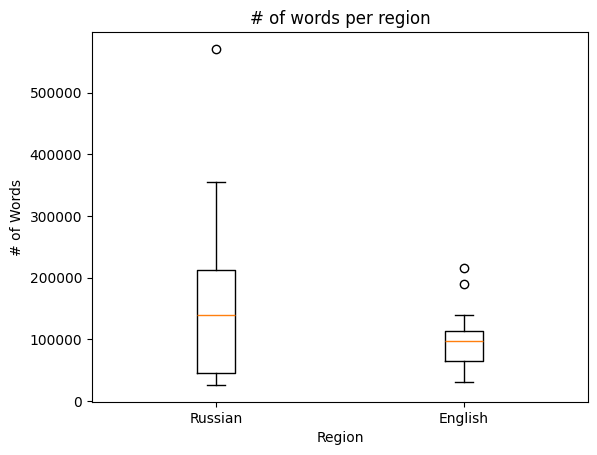

3.287786418127735
P-Value = 0.07890152985113039
Fail to reject the null hypothesis. No significant difference detected between the regions.


In [14]:
# Combine books from each region into a new dataset
region_word_count_list = [(word_count_list[0] + word_count_list[1]), (word_count_list[2] + word_count_list[3])]
region_word_count_list_labels = ["Russian", "English"]
region_word_count_list_xlabel = "Region"
region_word_count_list_ylabel = "# of Words"
region_word_count_list_title = "# of words per region"

createBoxPlot(region_word_count_list, region_word_count_list_labels,region_word_count_list_xlabel,region_word_count_list_ylabel,region_word_count_list_title)

# Run the Anova test to validate if there is significant difference.
statistic, p_value = f_oneway(region_word_count_list[0], region_word_count_list[1])
print(statistic)
print("P-Value = " + str(p_value))

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the regions")
else:
    print("Fail to reject the null hypothesis. No significant difference detected between the regions.")

Indeed Russian literature is longer on average, but the difference is still not significant, in contrast to what one might expect based on popular conceptions. Especially given the fact that the presence of "War and Peace" inflates these differences. 

Now across periods, we can see a clear downward trend. 

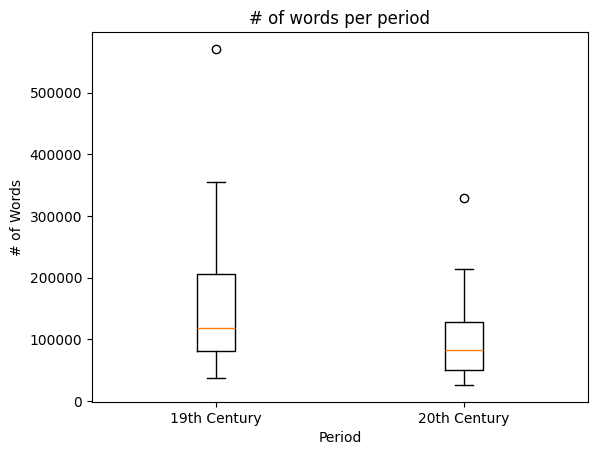

2.067061693148296
P-Value = 0.159927074421748
Fail to reject the null hypothesis. No significant difference detected between the regions.


In [15]:
# Combine books from each period into a new dataset
period_word_count_list = [(word_count_list[0] + word_count_list[2]), (word_count_list[1] + word_count_list[3])]
period_word_count_list_labels = ["19th Century", "20th Century"]
period_word_count_list_xlabel = "Period"
period_word_count_list_ylabel = "# of Words"
period_word_count_list_title = "# of words per period"

createBoxPlot(period_word_count_list, period_word_count_list_labels,period_word_count_list_xlabel,period_word_count_list_ylabel,period_word_count_list_title)

# Run the Anova test to validate if there is significant difference.
statistic, p_value = f_oneway(period_word_count_list[0], period_word_count_list[1])
print(statistic)
print("P-Value = " + str(p_value))

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the regions")
else:
    print("Fail to reject the null hypothesis. No significant difference detected between the regions.")

However, again in contrast to what one might expect, also these differences are not yet significant. 

To conclude, based on the current sample, there's no significant difference in word counts in books for any of these four groups, even when subdivided over period or region. 

### Basic Stats 2: Dialogue vs. Non-Dialogue Text
As a second basic statistic for the analysis of these books, I will assess the ratio between dialogue text and non-dialogue text. Here, one popular explanation might be that Russian books, coming from a more collectivist Russian culture, might contain more dialogue, as one expects more interactions between people in contrast to focus on the individual. 

First, here is the formula for differentiating dialogue and non-dialogue texts. Then, we run the same test of 

In [16]:
# Categorize paragraphs as being "Dialogue" or "Non-dialogue", based on the presence of multiple quotation marks.
def getRatio(book): 
    dialogueCount = 0
    for index, paragraph in book.items():
        quotes = 0
        for index, line in paragraph.items():
            # Sum the count of number of quotation marks in each sentence per paragraph
            quotes += line.count('"') + line.count('”') + line.count('‘') + line.count('’') + line.count("'") 
        # If there's more than 1 quotation mark, a paragraph is categorized as dialogue
        if quotes > 1:
            dialogueCount += 1
    # Calculate the ratio of dialogue paragraphs vs. total paragraphs in the book
    ratio = dialogueCount / len(book.keys())
    return ratio

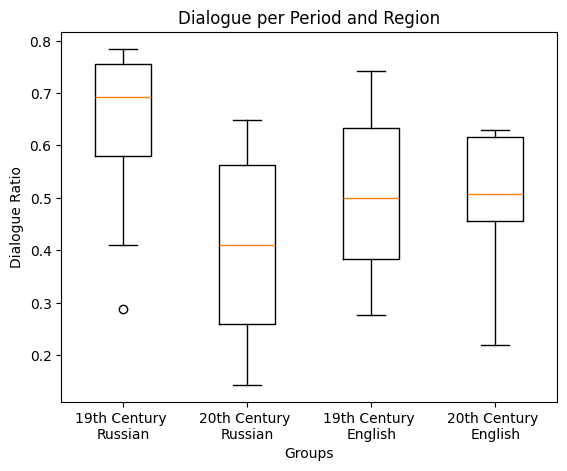

Test if there's a significant difference across findings.
2.788146938263524
P-Value = 0.057030736690929805
Fail to reject the null hypothesis. No significant difference detected between the groups.


In [17]:
ratio_index = [[],[],[],[]]
for name, book in russian_19th_century_books_dict.items():
    ratio_index[0].append(getRatio(book))
for name, book in russian_20th_century_books_dict.items():
    ratio_index[1].append(getRatio(book))
for name, book in english_19th_century_books_dict.items():
    ratio_index[2].append(getRatio(book))
for name, book in english_20th_century_books_dict.items():
    ratio_index[3].append(getRatio(book))

createBoxPlot(ratio_index, graph_labels, word_count_list_xlabel, "Dialogue Ratio", "Dialogue per Period and Region")

# Run the Anova test to validate if there is significant difference.
print("Test if there's a significant difference across findings.")
statistic, p_value = f_oneway(ratio_index[0], ratio_index[1], ratio_index[2], ratio_index[3])
print(statistic)
print("P-Value = " + str(p_value))

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the groups")
else:
    print("Fail to reject the null hypothesis. No significant difference detected between the groups.")

So there's still no significant difference across all findings. However, if we zoom in on 19th century russian literature, we can see that it is quite different from all the other three. Therefore, if we test the difference of this category compared to all the others we find that there is a significant difference.

In [18]:
# Run the Anova test to validate if there is significant difference.
print("Test if 19th century Russian literature is significantly different from the other findings.")
statistic, p_value = f_oneway(ratio_index[0], ratio_index[1] + ratio_index[2] + ratio_index[3])
print(statistic)
print("P-Value = " + str(p_value))

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the groups")
else:
    print("Fail to reject the null hypothesis. No significant difference detected between the groups.")

Test if 19th century Russian literature is significantly different from the other findings.
5.912084880199799
P-Value = 0.020631243969585936
Reject the null hypothesis. There is a significant difference between the groups


So we can conclude that at least all three other groups have significantly less dialogue than the Russian 19th century literature, which is up to almost 70%.

Then, if we further assess this data per region and per period:

Per region:


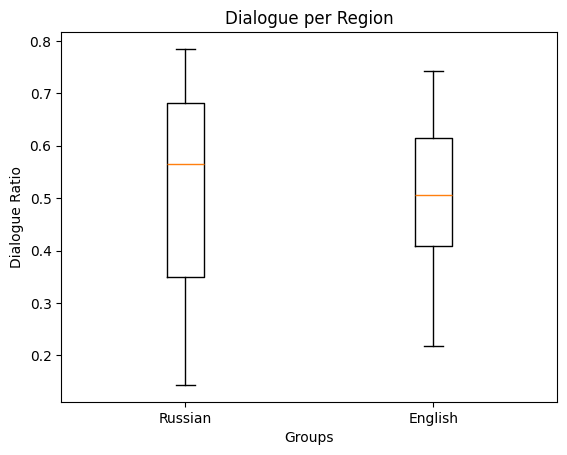

Test if there's a significant difference across findings.
0.015554582012504441
P-Value = 0.9015034466219447
Fail to reject the null hypothesis. No significant difference detected between the regions.

Per period:


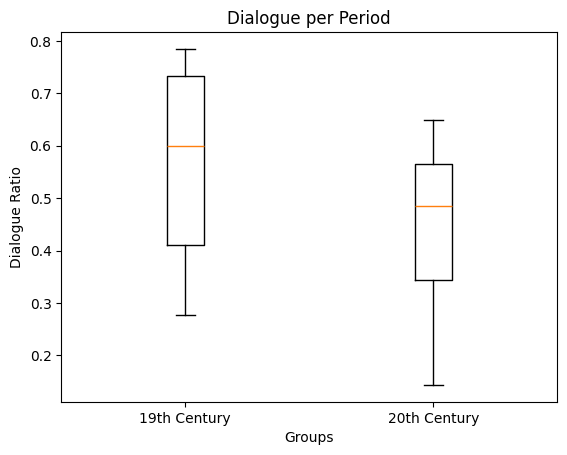

Test if there's a significant difference across findings.
4.460982397159639
P-Value = 0.042331299342045214
Reject the null hypothesis. There is a significant difference between the periods


In [19]:
#Region
print("Per region:")
createBoxPlot([ratio_index[0] + ratio_index[1], ratio_index[2]+ ratio_index[3]], region_word_count_list_labels, word_count_list_xlabel, "Dialogue Ratio", "Dialogue per Region")

# Run the Anova test to validate if there is significant difference.
print("Test if there's a significant difference across findings.")
statistic, p_value = f_oneway(ratio_index[0] + ratio_index[1], ratio_index[2] + ratio_index[3])
print(statistic)
print("P-Value = " + str(p_value))

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the regions")
else:
    print("Fail to reject the null hypothesis. No significant difference detected between the regions.")

#Period
print("\nPer period:")
createBoxPlot([ratio_index[0] + ratio_index[2], ratio_index[1]+ ratio_index[3]], period_word_count_list_labels, word_count_list_xlabel, "Dialogue Ratio", "Dialogue per Period")

# Run the Anova test to validate if there is significant difference.
print("Test if there's a significant difference across findings.")
statistic, p_value = f_oneway(ratio_index[0] + ratio_index[2], ratio_index[1] + ratio_index[3])
print(statistic)
print("P-Value = " + str(p_value))

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the periods")
else:
    print("Fail to reject the null hypothesis. No significant difference detected between the periods.")

So when combining the 19th and 20th century data, we can see that the differences for region almost entirely disappears and there's no significant difference between the regions. However, across time periods, there is a significant difference. This gives the impression that in the 20th century books may have become more descriptive or introspective, moving away from character interaction into more non-dialogue descriptions. 


### Basic Statistics 3: Number of characters
Next up, I will describe the number of characters in each book. However, before diving into the stats, I will first explain the extensive process of counting characters in a book and the value of GPT 4.0 in this process.

#### Method: Counting Characters
The complexity of counting characters is caused by three things. The first is that characters can have multiple names, such as a first name and a last name and then also petnames. Especially for Russian literature the use of different names for the same person is very common. Second, first names and last names might not uniquely belong to a single character. For example, a man and his wife usually share a last name, meaning that this last name, by itself, cannot be used as an identifier for either characters. Finally, in language persons are not always called by their names, but also often through personal pronouns, such as, "I", "you", "he", "she" or "they". For these, it is very difficult to understand their referrent. 

Some, but not all, of these issues in counting the occurence of characters can now be more simply resolved through the use of GPT 4.0. Specifically, to resolve for the first two issues, I have asked Bing AI to create dictionaries with all the characters of each of the books being studied and all their possible unique names in the book. After some small tweaks, it returned complete and extensive lists of characters and their different names. A manual review was required to tweak the list and ensure all names were in alignment with the full text names of the book, but the results were striking. The resulting dictionary has the following structure:
{
    "Full name of character is key" : ["Array", "with", "possible", "names", "as", "values]
}

This results in an array of names for each character, which can be used to identify the minimal appearance of characters in books. More appearances are still possible, for example through the use of pronouns, but not less. 

The code for all these character dictionaries is extensive, therefore, I will collapse the code box, but if you open it, you can find a brief description of how they work in the first set of characters.

In [20]:
#Russian 19th Century
character_dict_c_and_p = {
    # First character is Kolya, who is only named with one name
    'Kolya (Kid)': ["Kolya"], 
    # Second character is Mikolka, who is named with two distinct names
    'Mikolka (Painter)': ['Mikolka', 'Nikolay'], 
    'Alyona Ivanovna' : ['Alyona', 'Alyona Ivanovna'],
    'Arkady Ivanovitch': ['Arkady Ivanovitch', 'Svidrigailov'],
    'Koch': ['Koch'], 
    'Lida (Kid)': ['Lida', 'Lyona'],
    'Lebeziatnikov': ['Andrey','Andrey Semyonovitch', 'Lebeziatnikov'], 
    'Sonya': ['Sonya', 'Sonya Marmeladov', 'Sofya Semyonovna Marmeladov', 'Sofya'],
    'Razumihkin': ['Razumihin', 'Razumihkin', 'Dmitri', 'Dmitri Prokofitch'],
    'Nikodim Fomitch': ['Nikodim', 'Nikdim Fomitch'],
    'Ilya Petrovitch': ['Ilya', 'Ilya Petrovitch'],
    'Polenka (Kid)': ['Polenka'],
    'Dmitri (Patiner)' : ['Dmitri', 'Mitka'],
    'Lizaveta Ivanovna': ['Lizaveta', 'Lizaveta Ivanovna'],
    'Nastasya': ['Nastasya'],
    'Amalia Fyodorovna': ['Amalia', 'Amalia Fyodorovna'],
    'Zametov': ['Zametov', 'Zamyotov', 'Alexander Gigorevitch'],
    'Zossimov': ['Zossimov'],
    'Marfa Petrovna': ['Marfa', 'Marfa Petrovna'],
    'Luzhin': ['Luzhin', 'Pyotr', 'Pyotr Petrovitch'],
    # The main character is Raskolnikov, has many differnet pat names and full names used in different places in the book.
    'Raskolnikov' : ['Rodion', 'Rodian Romanovitch Raskolnikov', 'Rodya', 'Rodenka', 'Rodka', 'Rodian', 'Raskolnikov'],
    'Dunya': ['Dounia', 'Dunya', 'Avdotya Romanovna Raskolnikov'],
    'Pulcheria': ['Pulcheria', 'Pulcheria Alexandrovna', 'Pulcheria Alexandrovna Raskolnikov'],
    'Porfiry Petrovitch': ['Porfiry', 'Porfiry Petrovitch'],
    'Katerina Ivanovna Marmeladov': ['Katerina', 'Katerina Ivanovna Marmeladov', 'Katerina Ivanovna']
}
character_dict_w_and_p = {
    "Pierre Bezukhov": ["Pierre", "Paul"],
    "Andrew Bolkonski": ["Andrew", "Prince Andrew", "Bolkonski"],
    "Natasha Rostova": ["Natasha", "Natalie", "Natalia", "Rostova"],
    "General Kutuzov": ["Kutuzov", "Mikhail Illarionovich Kutuzov"],
    "Platon Karataev": ["Karataev", "Platochka"],
    "Anna Pavlovna Scherer": ["Anna Pavlovna", "Anna"],
    "Mary Bolkonskaya": ["Mary", "Marie", "Maria", "Masha", "Bolkonskaya"],
    "Mademoiselle Bourienne": ["Bourienne"],
    "Julie Karagina": ["Julie", "Julia", "Karagina"],
    "Count Ilya Rostov": ["Count Rostov", "Ilya Rostov", "Ilya", "Count"],
    "Countess Natalya Rostova": ["Countess Rostova", "Natalya Rostova", "Natalya", "Countess"],
    "Nicholas Rostov": ["Nicholas", "Nikolai"],
    "Sonya Rostova": ["Sonya", "Sophie", "Sofya"],
    "Denisov": ["Denisov", "Vaska"],
    "Dolokhov": ["Dolokhov", "Fedor Ivanovich Dolokhov"],
    "Anatole Kuragin": ["Anatole", "Kuragin"],
    "Helene Kuragina": ["Helene", "Ellen", "Kuragina"],
    "Boris Drubetskoy": ["Boris", "Drubetskoy"],
    "Berg": ["Berg", "Wassily Ivanovich Berg"],
    "Vera Rostova": ["Vera", "Verusha", "Rostova"],
    "Hippolyte Kuragin": ["Hippolyte", "Hippolyte Kuragin"],
    "Princess Drubetskaya": ["Princess Drubetskaya", "Drubetskaya"],
    "Prince Vasili Kuragin": ["Prince Vasili", "Vasili Kuragin", "Vasili"],
    "Lise Bolkonskaya": ["Lise", "Elisabeth", "Liza", "Bolkonskaya"],
    "Pyotr Bezukhov": ["Pyotr Kirillovich", "Bezukhov", "Pyotr"],
    "Vasili Denisov": ["Denisov", "Vaska"],
    "Tikhon": ["Tikhon"],
    "Mavra Kuzminishna": ["Mavra Kuzminishna", "Mavra"],
    "Petya Rostov": ["Petya", "Petrusha"],
    "Timokhin": ["Timokhin"],
    "Karataev's orderly": ["Karataev's orderly"],
    "Alpatych": ["Alpatych"],
    "Balaga": ["Balaga"],
    "Davout": ["Davout"],
    "Murat": ["Murat"],
    "Napoleon Bonaparte": ["Napoleon", "Bonaparte"],
    "Emperor Alexander": ["Alexander"],
    "Catiche": ["Catiche"],
    "Gerasim": ["Gerasim"],
    "Mitenka": ["Mitenka"],
    "Ramballe": ["Ramballe"],
    "Tushin": ["Tushin"],
    "Vasilchikov": ["Vasilchikov"],
    "Weyrother": ["Weyrother"],
    "Bagration": ["Bagration"],
    "Barclay de Tolly": ["Barclay de Tolly", "Barclay"],
    "Bennigsen": ["Bennigsen"],
    "Dokhturov": ["Dokhturov"],
    "Grouchy": ["Grouchy"],
    "Kaysarov": ["Kaysarov"],
    "Kienmayer": ["Kienmayer"],
    "Kozlovsky": ["Kozlovsky"],
    "Miloradovich": ["Miloradovich"],
    "Mortier": ["Mortier"],
    "Pfuel": ["Pfuel"],
    "Platov": ["Platov"],
    "Raevsky": ["Raevsky"],
    "Schwarzenberg": ["Schwarzenberg"],
    "Tolstoy": ["Tolstoy"],
    "Uvarov": ["Uvarov"],
}
character_dict_brothers_karamazov = {
  'Fyodor Pavlovich Karamazov': ['Fyodor Pavlovich Karamazov', 'Fyodor', 'Papa', 'Pavlovich'],
  'Dmitri Karamazov': ['Dmitri Karamazov', 'Dmitri', 'Mitya', 'Mitka'],
  'Ivan Karamazov': ['Ivan Karamazov', 'Ivan', 'Vanya'],
  'Alexei Karamazov': ['Alexei Karamazov', 'Alyosha', 'Alexei'],
  'Grushenka': ['Grushenka', 'Grusha', 'Agafya'],
  'Katerina Ivanovna Verkhovtseva': ['Katerina Ivanovna Verkhovtseva', 'Katerina', 'Katya', 'Katenka'],
  'Smerdyakov': ['Smerdyakov', 'Smierdyakov', 'Pavel', 'Pavel Fyodorovich'],
  'Father Zosima': ['Father Zosima', 'Zossima', 'Zosima'],
  'Rakitin': ['Rakitin', 'Pyotr Alexandrovich', 'Pyotr'],
  'Ilyusha Snegiryov': ['Ilyusha Snegiryov', 'Ilyushechka', 'Ilyusha'],
  'Kolya Krasotkin': ['Kolya Krasotkin', 'Nikolai', 'Kolya'],
  'Lise Khokhlakov': ['Lise Khokhlakov', 'Lise'],
  'Lisaveta Smerdyashchaya': ['Lisaveta'],
  'Captain Snegiryov': ['Captain Snegiryov', 'Snegiryov'],
  'Madame Khokhlakov': ['Madame Khokhlakov', 'Khokhlakov'],
  'Agafya Tikhonovna': ['Agafya Tikhonovna', 'Agafya' ,'Agasha'],
  'Ippolit Kirillovich': ['Ippolit Kirillovich', 'Ippolit'],
  'Kuzma Samsonov': ['Kuzma Samsonov', 'Samsonov'],
  'Lyagavy': ['Lyagavy'],
  'Herzenstube': ['Herzenstube'],
  'Miusov': ['Miusov'],
  'Nikolai Ivanov Krasotkin': ['Nikolai'],
  'Pyotr Fomich Kalganov': ['Pyotr Fomich Kalganov', 'Kalganov'],
  'Sofya Ivanovna Svyatopolk-Mirskaya': ['Sofya Ivanovna Svyatopolk-Mirskaya', 'Sofya'],
  'Trifon Borisovich': ['Trifon Borisovich', 'Trifon'],
  'Vrublevsky': ['Vrublevsky', 'Vrublevsky'],
}
character_dict_dead_souls = {
  'Pavel Ivanovich Chichikov': ['Pavel Ivanovich Chichikov', 'Chichikov'],
  'Selifan': ['Selifan'],
  'Nastasya Petrovna Korobotchkina': ['Nastasya Petrovna Korobotchkina', 'Korobotchkina', 'Nastasia', 'Petrovna'],
  'Petrushka': ['Petrushka'],
  'Nozdryov': ['Nozdryov'],
  'Manilov': ['Manilov'],
  'Lizanka': ['Lizanka'],
  'Themistoclus': ['Themistoclus'],
  'Mihail Semyonovitch Sobakevitch': ['Mihail Semyonovitch Sobakevitch', 'Sobakevitch'],
  'Plyushkin': ['Plyushkin'],
  'Ivan Grigoryevitch': ['Grigoryevitch'],
  'Ivan Antonovitch': ['Antonovitch'],
  'The Governor': ['Governor'],
  'The Governor’s Daughter': ['Daughter'],
  'Captain Kopeykin': ['Captain Kopeykin']
}
character_dict_notes_from_underground = {
  'The Underground Man': ['The Underground Man', 'I'],
  'Liza': ['Liza'],
  'Simonov': ['Simonov'],
  'Zverkov': ['Zverkov'],
  'Ferfichkin': ['Ferfichkin'],
  'Trudolyubov': ['Trudolyubov'],
  'Apollon': ['Apollon'],
  'Anton Antonych Setochkin': ["Anton"],
  'The Officer' : ["Officer"]
}
character_dict_the_duel = {
  'Ivan Andreitch (Vanya) Laevsky': ['Ivan Andreitch (Vanya) Laevsky', 'Vanya', 'Ivan', 'Laevsky'],
  '“Kolya” Von Koren': ['“Kolya” Von Koren', 'Kolya', 'Nikolai', 'Koren'],
  'Alexandr Daviditch Samoylenko': ['Alexandr Daviditch Samoylenko', 'Samoylenko'],
  'Nadyezhda Fyodorovna': ['Nadyezhda Fyodorovna', 'Nadyezhda', 'Nadya'],
  'Ilya Mihalitch Kirilin' : ["Ilya", "Kirilin"]
}
character_dict_eugene_onegin = {
  'Eugene Onegin': ['Eugene Onegin', 'Oneguine', 'Eugene'],
  'Vladimir Lensky': ['Vladimir Lensky', 'Lensky', 'Vlad'],
  'Tatyana Larina': ['Tatyana Larina', 'Tattiana'],
  'Olga Larina': ['Olga'],
  'Filipyevna': ['Filipyevna'],
  'Monsieur Guillot': ['Monsieur Guillot', 'Guillot'],
  'Captain': ['Captain'],
  'Zaretsky': ['Zaretsky'],
  'Triquet': ['Triquet']
}
character_dict_fathers_and_sons = {
  'Nikolai Petrovitch Kirsanov': ['Nikolai Petrovitch Kirsanov', 'Nikolai', "Peter"],
  'Arkady Nikolayevitch Kirsanov': ['Arkady Nikolayevitch Kirsanov', 'Arkady'],
  'Bazarov': ['Bazarov'],
  'Anna Sergeyevna Odintsova': ['Anna Sergeyevna Odintsova', 'Anna'],
  'Yevgeny Vassilievitch Bazarov': ['Yevgeny Vassilievitch Bazarov', 'Evgenii'],
  'Arina Vlassevna Bazarov': ['Arina Vlassevna Bazarov', 'Arina'],
  'Pavel Petrovitch Kirsanov': ['Pavel Petrovitch Kirsanov', 'Paul'],
  'Fenichka': ['Fenichka', 'Eniushka'],
  'Katerine Sergeyevna Lokteva (Katya)': ['Katia', "Katerina"],
  'Prokofitch': ['Prokofitch'],
  'Viktor Sitnikov': ['Viktor Sitnikov', 'Viktor'],
  'Avdotya Nikitishna Kukshina': ['Kukshin', 'Avdotya'],
  'Mitya': ['Mitya'],
  'Dunyasha': ['Dunyasha'],
  'Princess Abdotya Stepanovna': ['Abdotya'],
  'Matvei Ilyich Kolyazin': ['Matvei'],
  'Porfiry Platonovitch': ['Porfiry'],
  'Fedka': ['Fedka'],
  'Piotr': ['Piotr']
}
character_dict_the_idiot = {
  'Prince Lev Nikolayevich Myshkin': ['Prince Lev Nikolayevich Myshkin', 'Muishkin', 'Lef', 'prince', 'Nicolaievitch' ],
  'Aglaya Ivanovna Epanchina': ['Aglaya Ivanovna Epanchina', 'Aglaya'],
  'Alexandra Ivanovna Epanchin': ['Alexandra Ivanovna Epanchina', 'Alexandra'],
  'Adelaida Ivanovna Epanchin': ['Adelaida Ivanovna Epanchin', 'Adelaida'],
  'Nastasya Filippovna Barashkova': ['Nastasya Filippovna Barashkova', 'Nastasya Filippovna', 'Nastasia'],
  'Parfyon Semyonovich Rogozhin': ['Parfyon Semyonovich Rogozhin', 'Rogojin'],
  'Gavrila Ardalionovich Ivolgin': ['Gavrila Ardalionovich Ivolgin', 'Ganya', 'Gavrila'],
  'Lizaveta Prokofyevna Yepanchina': ['Lizaveta Prokofyevna Yepanchina', 'Elizabetha', 'Madame Epanchin'],
  'General Ivan Fyodorovich Epanchin': ['General Ivan Fyodorovich Epanchin', 'General Epanchin', 'General', 'Ivan'],
  'Varvara Ardalionovna Ivolgina': ['Varvara Ardalionovna Ivolgina', 'Varvara', 'Varia'],
  'Afanasy Ivanovich Totsky': ['Afanasy Ivanovich Totsky', 'Totski'],
  'Ippolit Terentyev': ['Ippolit Terentyev', 'Hippolyte'],
  'Ferdyschenko': ['Ferdyschenko'],
  'Keller': ['Keller'],
  'Lukyan Timofeevich Lebedev': ['Lebedyev'],
  'Antip Burdovsky': ['Antip'],
  'General Ardalion Alexandrovich Ivolgin': ['General Ardalion Alexandrovich Ivolgin', 'General Ivolgin', "Ivolgin"],
  'Darya Alexeyevna': ['Darya'],
  'Yevgeny Pavlovich Radomsky': ['Yevgeny Pavlovich Radomsky', 'Yevgeny'],
  'Ferdyshchenko': ['Ferdishenko'],
  'Ivan Petrovich Ptitsyn': ['Ivan Petrovich Ptitsyn', 'Ptitsyn'],
  'Anna Fedorovna': ['Anna'],
  'Lukyan Timofeevich Lebedyev': ['Lukyan Timofeevich Lebedyev', 'Lukyan'],
  'Vera Lebedyev': ['Vera Lebedyev', 'Vera'],
  'Mrs. Nina Alexandrovna Ivolgin': ["Nina"],
  'Mavra': ['Mavra'],
  'Mrs. Terentyev': ['Terentyev'],
  'Kolya Ivolgin': ['Kolya Ivolgin', "Kolya", "Colya"],
  'Princess Belokonsky': ['Belokonsky']
}

russian_19th_century_char_dict = {
    "Brothers Karamazov": character_dict_brothers_karamazov,
    "War and Peace" : character_dict_w_and_p,
    "Crime and Punishment" : character_dict_c_and_p,
    "Dead Souls": character_dict_dead_souls,
    "Notes from the Underground": character_dict_notes_from_underground,
    "The Duel" : character_dict_the_duel,
    "Eugene Onegin": character_dict_eugene_onegin,
    "Fathers and Sons": character_dict_fathers_and_sons,
    "The Idiot": character_dict_the_idiot
}

character_dict_mother = {
  'Pelagueya Nilovna Vlasova': ['Pelagueya Nilovna Vlasova', 'Pelagueya', 'Vlasova', 'mother'],
  'Michael Vlasov': ['Michael', 'Vlasov'],
  'Pavel Vlasov': ['Pavel Vlasov', 'Pavel'],
  'Little Russian': ['Little'],
  'Alexey Ivanovich': ['Alexey'],
  'Andrey': ['Andrey'],
  'Sashenka': ['Sashenka'],
  'Natasha': ['Natasha'],
  'Vyesovshchikov': ['Vyesovshchikov'],
  'Rybin': ['Rybin'],
  'Nikolay Ivanovich': ['Nikolay'],
  'Sofya Ivanovich': ['Sofya']
}
character_dict_ivan = {
  'Ivan Denisovich Shukhov': ['Ivan Denisovich Shukhov', 'Shukhov'],
  'Tyurin': ['Tyurin'],
  'Tsezar': ['Tsezar'],
  'Fetyukov': ['Fetyukov'],
  'Alyoshka': ['Alyoshka'],
  'Pavlo': ['Pavlo'],
  'Kolya Vdovushkin': ['Kolya', 'Vdovushkin'],
  'Buynovsky': ['Buynovsky'],
  'Gopchik' : ['Gopchik'],
  'Eino': ['Eino'],
  'Kildigs' : ['Kildigs'],
  'Snub Nose' : ['Snub']
}
character_dict_zhivago = {
  'Yuri Zhivago': ['Yuri Zhivago', 'Yurii', 'Andreievich', 'Yurochka'],
  'Larisa Fyodorovna Antipova': ['Larisa Fyodorovna Antipova', 'Lara', 'Lurochka', 'Larisa'],
  'Viktor Komarovsky': ['Viktor Komarovsky', 'Viktor', 'Komarovsky'],
  'Tonya Gromeko': ['Tonya Gromeko', 'Tonya'],
  'Pasha Antipov': ['Pasha Antipov', 'Strelnikov', 'Pasha'],
  'Alexander Alexandrovich': ['Alexander Alexandrovich', 'Alexander'],
  'Anna Ivanovna Gromeko': ['Anna Ivanovna Gromeko', 'Anna'],
  'Evgraf Zhivago': ['Evgraf Zhivago', 'Evgraf'],
  'Misha Gordon': ['Misha Gordon', 'Misha'],
  'Marya Nikolaevna Zhivago': ['Marya Nikolaevna Zhivago'],
  'Nikolai Nikolaevich Vedenyapin': ['Nikolai Nikolaevich Vedenyapin', 'Kolya', 'Nikolai'],
  'Amalia Yefimovna Guichard': ['Amalia Yefimovna Guishar', 'Amalia', 'Guishar'],
  'Ivan Ivanovich Voskoboinikov': ['Ivan Ivanovich Voskoboinikov', 'Ivan'],
  'Sasha': ['Sasha'],
  'Tonia': ['Tonia'],
  'Seryozha': ['Seryozha'],
  'Nika Dudorov': ['Nika Dudorov'],
  'Daria': ['Daria'],
  'Makarych': ['Makarych'],
  'Kostoyed': ['Kostoyed'],
  'Kolya': ['Kolya'],
  'Maksik': ['Maksik'],
  'Kapitolina ': ['Kapitolina'],
  'Klavdia': ['Klavdia'],
  'Zinaida': ['Zinaida'],
  'Vasya': ['Vasya'],
  'Rodion': ['Rodion', 'Rodia']
}
character_dict_heart_of_a_dog = {
  'Sharik / Polygraph Polygraphovich Sharikov': ['Sharik', 'Polygraph Polygraphovich Sharikov', 'Polygraph', 'Sharikov'],
  'Professor Philip Philippovich Preobrazhensky': ['Professor Philip Philippovich Preobrazhensky', 'Preobrazhensky', 'Philip'],
  'Dr. Ivan Arnoldovich Bormenthal': ['Dr. Ivan Arnoldovich Bormenthal', 'Bormenthal', 'Ivan'],
  'Shvonder': ['Shvonder'],
  'Darya Petrovna Ivanova': ['Darya Petrovna Ivanova', 'Darya'],
  'Fyodor': ['Fyodor'],
  'Klim Grigorievich Chugunkin': ['Klim Grigorievich Chugunkin', 'Chugunkin', 'Klim'],
  'Vasnetsova': ['Vasnetsova'],
  'Zinaida (Zina) Prokofievna Bunina': ['Zinaida (Zina) ProkofievnaBunina', 'Zina', 'Zinaida'],
  'Vyazemskaya': ['Vyazemskaya']
}
character_dict_life_and_fate = {
  'Viktor Pavlovich Strum': ['Viktor Pavlovich Strum', 'Strum', 'Shtrum', 'Viktor'],
  'Lyudmila Afanasyevna': ['Lyudmila Afanasyevna', 'Lyudmila', 'Lyuda'],
  'Viktor Shtrum\'s father': ['Viktor Shtrum\'s father', 'father'],
  'Nadya Nikolayevna': ['Nadya Nikolayevna', 'Nadya'],
  'Alexandra Vladimirovna': ['Alexandra'],
  'Yevgenia Nikolaevna Shaposhnikova': ['Yevgenia Nikolaevna Shaposhnikova', 'Yevgenia', 'Zhenya' , 'Shaposhnikova'],
  'Ivan Grigoryevich Novikov': ['Ivan Grigoryevich Novikov', 'Novikov', 'Ivan'],
  'Antonina Sergeyevna': ['Antonina'],
  'Dementiy Trifonovich Getmanov' : ['Dementiy'],
  'Abarchuk': ['Abarchuk'],
  'Pyotr Lavrentyevich Sokolov': ['Pyotr'],
  'Mikhail Sidorovich Mostovskoy' : ['Mikhail'],
  'Sofya Osipovna Levinton': ['Sofya'],
  'Captain Grekov' : ['Grekov'],
  'Nikolay Grigorevich Krymov' : ['Nikolay'],
  'Colonel Pyotr Pavlovich Novikov': ['Pavlovich', 'Colonel']
}
character_dict_petersburg = {
  'Nikolai Apollonovich Ableukhov': ['Nikolai Apollonovich Ableukhov', 'Nikolai', 'Nikolenka', 'Kolenka'],
  'Apollon Apollonovich Ableukhov': ['Apollon'],
  'Anna Petrovna Ableukhova': ['Anna'],
  'Sofya Petrovna Likhutina': ['Sofya'],
  'Mavrushka': ['Mavrushka'],
  'Sergei Sergeyevich Likhutin': ['Sergei', 'Seryozhka'],
  'Nikolai Stepanovich Lippanchenko': ['Stepanovich', 'Lipensky', 'Lippanchenko'],
  'Varvara Yevgrafovna Solovyova': ['Varvara'],
  'Nikolai Petrovich Tsukatov': ['Coco'],
  'Lyubov\' Alekseyevna Tsukatova': ['Lyubov\'', ''],
  'Leib Hussar Shporyshev': ['Leib'],
  'Baron Ommau-Ommergau': ['Ommau-Ommergau'],
  'Count Aven': ['Aven'],
  'Herman Hermanovich Verhefden': ['Herman'],
  'Aleksandr Ivanovich Dudkin': ['Aleksandr'],
  'Zoya Zakharovna Fleisch': ['Zoya'],
  'Pavel Yakovlevich Morkovin or Voronkov': ['Pavel', 'Voronkov'],
  'Mindalini': ['Mindalini', 'Mantalini'],
  'Matvei Morzhov': ['Matvei'],
  'Dmitrich Semyonych': ['Dmitrich'],
  'Ivan Ivanych Ivanov': ['Ivan'],
  'Bessmertny': ['Bessmertny'],
  'Neintelpfain': ['Neintelpfain'],
  'Stepan Styopka': ['Stepan'],
  'Grishka': ['Grishka'],
}
character_dict_we = {
  'D-503': ['D-503', "I"],
  'I-330': ['I-330'],
  'O-90': ['O-90', 'O-', 'O'],
  'S-4711': ['S-4711', 'S-'],
  'U': ['U'],
  'R-13': ['R-13', 'R-'],
  'The Benefactor': ['Benefactor'],
  'The Skinny Doctor': ['Skinny'],
  'D-503\'s Neighbor': ['Neighbor'],
  'Second Doctor': ['Second'],
  'Second Builder': ['Builder'],
  'Old Woman': ['Woman'],
}
character_dict_master_margarita = {
    'Woland': ['Woland', 'Satan'],
    'Margarita': ['Margarita'],
    'The Master': ['Master'],
    'Behemoth': ['Behemoth'],
    'Azazello': ['Azazello'],
    'Koroviev': ['Koroviev'],
    'Ivan Ponyrev': ['Ivan', 'Homeless'],
    'Pontius Pilate': ['Pontius'],
    'Yeshua Ha-Notsri': ['Yeshua'],
    'Natasha': ['Natasha'],
    'Nikanor Ivanovich': ['Nikanor', 'Bosoy'],
    'Fagotto': ['Fagotto'],
    'Abadonna': ['Abadonna'],
    'Aloysius Mogarych': ['Aloysius Mogarych'],
    'Annushka': ['Annushka'],
    'Baron Meigel': ['Meigel'],
    'Begemot': ['Begemot'],
    'Bengalsky': ['Bengalsky'],
    'Mikhael Alexandrovich Berlioz': ['Berlioz'],
    'Bulgakov': ['Bulgakov'],
    'Dr. Stravinsky': ['Dr. Stravinsky'],
    'Matthew Levi' : ['Levi'],
    'Styopa Likhodeev': ['Styopa'],
    'Hella': ['Hella'],
    'Nikolai Ivanovich': ['Nikolai'],
    'Grigory Danilovich Rimsky': ['Rimsky'],
    'Judas of Kiriath' : ['Judas'],
    'Joseph Kaifa': ['Joseph'],
    'Banga' : ['Banga'],
    'Frieda': ['Frieda'],
    'Bar-Rabban': ['Bar-Rabban'],
    'Alexander Riukhin': ['Riukhin'],
    'Maximillian Andreevich Poplavsky' : ['Poplavsky'],
    'Arkady Apollonovich': ['Arkady'],
    'Aloisy Mogarych' : ['Aloisy'],
    'Andrei Fokich Sokov' : ['Andrei']
}
character_dict_life_of_insects = {
    'Arthur': ['Arthur', 'Russian mosquito', 'Pa'],
    'Arnold': ['Arnold', 'Russian mosquito'],
    'Sam': ['Sam', 'American mosquito'],
    'Archibald': ['Archibald', 'Mosquito'],
    'Father scarab beetles': ['father', 'Pa', 'Scarab beetles'],
    'Son scarab beetles' : ['son', 'boy'],
    'Marina': ['Marina'],
    'Nikolai': ['Nikolai'],
    'Natasha' : ['Natasha'],
    'Maxim' : ['Maxim'],
    'Nikita': ['Nikita'],
    'Dima': ['Dima'],
    'Mitya': ['Mitya'],
    'Seryozha': ['Seryozha']
}

russian_20th_century_char_dict = {
    "Mother": character_dict_mother,
    "A Day in the Life of Ivan Denisovich": character_dict_ivan,
    "Dr. Zhivago": character_dict_zhivago,
    "Heart of a Dog": character_dict_heart_of_a_dog,
    "Life and Fate": character_dict_life_and_fate,
    "The Life of Insects": character_dict_life_of_insects,
    "Petersburg": character_dict_petersburg,
    "We": character_dict_we,
    "The Master and Margarita" : character_dict_master_margarita,
}

#English 19th
character_dict_portrait = {
  'Dorian Gray': ['Dorian', 'Dorian Gray'],
  'Lord Henry Wotton': ['Lord Henry Wotton', 'Henry', 'Harry'],
  'Basil Hallward': ['Basil Hallward', 'Basil'],
  'Sibyl Vane': ['Sibyl Vane', 'Sibyl'],
  'James Vane': ['James Vane', 'James'],
  'Alan Campbell': ['Alan Campbell', 'Alan'],
  'Mrs. Vane': ['Mrs. Vane'],
  'Lady Agatha': ['Lady Agatha', 'Agatha'],
  'Lady Brandon': ['Lady Brandon', 'Brandon'],
  'Victoria Wotton': ['Victoria Wotton', 'Victoria'],
  'Lady Narborough': ['Lady Narborough', 'Narborough'],
  'Duchess of Harley': ['Duchess of Harley','Harley'],
  'Lady Alice Chapman': ['Lady Alice Chapman', 'Alice'],
  'Mrs. Leaf': ['Mrs. Leaf', 'Leaf']
}
character_dict_expectations = {
  'Pip Pirrip': ['Pip', 'Philip Pirrip', 'Philip'],
  'Abel Magwitch': ['Abel', 'Provis', 'Convict'],
  'Estella Havisham': ['Estella Havisham', 'Estella', 'Havisham'],
  'Joe Gargery': ['Joe Gargery', 'Joe'],
  'Biddy': ['Biddy'],
  'Wemmick': ['Wemmick'],
  'Mrs. Joe Gargery': ['Mrs.'],
  'Compeyson': ['Compeyson'],
  'Herbert Pocket': ['Herbert'],
  'Mr. Jaggers': ['Jaggers'],
  'Orlick': ['Orlick'],
  'Bentley Drummle': ['Bentley'],
  'Startop': ['Startop'],
  'Clara Barley': ['Clara Barley'],
  'Molly': ['Molly'],
  'Arthur Havisham': ['Arthur Havisham'],
  'Sarah Pocket': ['Sarah Pocket'],
  'Camilla': ['Camilla'],
  'Raymond': ['Raymond'],
  'Mrs. Coiler': ['Mrs. Coiler'],
  'Mr. Wopsle': ['Mr. Wopsle'],
  'Dolge Orlick': ['Dolge Orlick'],
  'Georgiana': ['Georgiana'],
  'Miss Skiffins': ['Miss Skiffins'],
  'Clarriker': ['Clarriker'],
  'Trabb\'s Boy': ['Trabb\'s Boy'],
  'Trabb': ['Trabb'],
  'Uncle Pumblechook': ['Pumblechook'],
  'Barnard': ['Barnard'],
  'Brandley': ['Brandley'],
  'Cousin Raymond': ['Cousin Raymond'],
  'Drummle': ['Drummle'],
  'Fisher': ['Fisher'],
  'Gruffandgrim': ['Gruffandgrim'],
  'Hubble': ['Hubble'],
  'Jerry': ['Jerry'],
  'Mr. Campbell': ['Mr. Campbell'],
  'Mr. Hubble': ['Hubble'],
  'Mr. James Harthouse': ['Mr. James Harthouse'],
  'Mr. Matthew Pocket': ['Matthew'],
  'Mr. Trabb': ['Trabb'],
  'Mrs. Pocket': ['Pocket'],
  'Parker': ['Parker'],
  'Sarah': ['Sarah'],
  'Sophia': ['Sophia'],
  'The Avenger': ['Avenger'],
  'The Aged Parent': ['Aged'],
}
character_dict_heights = {
  'Heathcliff': ['Heathcliff'],
  'Catherine Earnshaw': ['Catherine'],
  'Edgar Linton': ['Edgar'],
  'Nelly Dean': ['Nelly', 'Ellen'],
  'Hindley Earnshaw': ['Hindley'],
  'Isabella Linton': ['Isabella'],
  'Frances Earnshaw': ['Frances'],
  'Hareton Earnshaw': ['Hareton'],
  'Catherine Linton': ['Cathy', 'Young'],
  'Mr. Lockwood': ['Lockwood'],
  'Mr. Earnshaw' : ['Mister'],
  'Mrs. Earnshaw' : ['Mrs'],
  'Joseph': ['Joseph'],
  'Zillah': ['Zillah'],
  'Mr. Green' : ['Green']
}
character_dict_cities = {
  'Charles Darnay': ['Charles', 'Darnay'],
  'Sydney Carton': ['Sydney'],
  'Doctor Manette': ['Manette', 'Alexandre', 'Doctor'],
  'Lucie Manette': ['Lucie'],
  'Monsieur Defarge': ['Monsieur Defarge', 'Monsieur'],
  'Madame Defarge': ['Madame Defarge', 'Madame'],
  'Jarvis Lorry': ['Jarvis'],
  'Marquis St. Evrémonde': ['Marquis'],
  'Jerry Cruncher': ['Jerry'],
  'Miss Pross': ['Pross'],
  'John Barsad': ['John'],
  'Roger Cly': ['Roger'],
  'Gaspard': ['Gaspard'],
  'The Vengeance': ['Vengeance'],
  'Old Foulon': ['Foulon'],
  'Young Jerry': ['Jerry'],
  'Solomon Pross': ['Solomon Pross'],
  'Stryver': ['Stryver'],
  'Gabelle': ['Gabelle'],
  'The Seamstress': ['Seamstress'],
  'C. J. Stryver': ['Stryver']
}
character_dict_worlds = {
  'The Narrator': ['Narrator', 'I'],
  'The Martians': ['Martian', 'Martians'],
  'The Artilleryman': ['artilleryman'],
  'The Curate': ['curate'],
  'The Narrator’s Brother': ['brother'],
  'The Narrator’s Wife': ['wife'],
  'Ogilvy': ['Ogilvy'],
  'Mrs. Elphinstone': ['Elphinstone'],
  'The Innkeeper': ['innkeeper'],
  'Stent': ['Stent'],
  'Lord Hilton': ['Hilton'],
  'Henderson': ['Henderson']
}
character_dict_huck_finn = {
  'Huckleberry “Huck” Finn': ['Huck', 'I'],
  'Jim': ['Jim'],
  'Tom Sawyer': ['Tom'],
  'Pap Finn': ['pap', 'Pap', 'Finn'],
  'Widow Douglas': ['Douglas', 'Miss Watson', 'Widow'],
  'Miss Watson' : ['Watson'],
  'Judge Thatcher' : ['Thatcher', 'Judge'],
  'Grangerfords' : ['Grangerfords'],
  'The Wilks Family' : ['Wilks'],
  'Silas Phelps': ['Silas'],
  'Sally Phelps': ['Sally'],
  'Aunt Polly' : ['Polly'],
  'The duke and the dauphin': ['duke']
}
character_dict_scarlet_letter = {
  'Hester Prynne': ['Hester', 'Prynne'],
  'Arthur Dimmesdale': ['Arthur', 'Dimmesdale'],
  'Roger Chillingworth': ['Roger'],
  'Pearl': ['Pearl'],
  'Governor Bellingham': ['Bellingham', 'Governor'],
  'Mistress Hibbins': ['Hibbins'],
  'Reverend Mr. John Wilson': ['John', 'Wilson'],
}
character_dict_moby_dick = {
  'Ishmael': ['Ishmael', 'I'],
  'Captain Ahab': ['Ahab', 'Captain'],
  'Moby Dick': ['Dick', 'Moby'],
  'Queequeg': ['Queequeg'],
  'Starbuck': ['Starbuck'],
  'Stubb': ['Stubb'],
  'Flask': ['Flask'],
  'Daggoo': ['Daggoo'],
  'Tashtego': ['Tashtego'],
  'Pip': ['Pip'],
  'Fedallah': ['Fedallah'],
  'Captain Boomer': ['Boomer'],
  'Father Mapple': ['Mapple'],
  'Captain Bildad': ['Bildad'],
  'Captain Peleg': ['Peleg'],
  'Elijah': ['Elijah'],
  'Gabriel': ['Gabriel'],
  'Bulkington': ['Bulkington']
}

english_19th_century_char_dict = {
    "Picture of Dorian Gray" : character_dict_portrait, 
    "Great Expectations": character_dict_expectations, 
    "Wuthering Heights": character_dict_heights, 
    "Tale of Two Cities": character_dict_cities,
    "War of the Worlds": character_dict_worlds,
    "The Adventures Of Huckleberry Finn": character_dict_huck_finn,
    "Scarlet Letter": character_dict_scarlet_letter,
    "Moby Dick": character_dict_moby_dick
}

#English 20th
character_dict_ulysses = {
    "Leopold Bloom": ["Leopold Bloom", "Leopold", "Leo", "Bloom"],
    "Molly Bloom": ["Molly Bloom", "Molly", "Marion"],
    "Stephen Dedalus": ["Stephen Dedalus", "Stephen", "Dedalus"],
    "Malachi Mulligan": ["Malachi Mulligan", "Buck", "Mulligan"],
    "Haines": ["Haines"],
    "Hugh Boylan": ["Hugh Boylan", "Boylan", "Blazes"],
    "Simon Dedalus": ["Simon Dedalus", "Simon", "Daedalus"],
    "Martin Cunningham": ["Martin Cunningham", "Cunningham"],
    "Nosey Flynn": ["Nosey Flynn", "Flynn"],
    "John Henry Menton": ["John Henry Menton", "Menton"],
    "Lenehan": ["Lenehan"],
    "Gerty MacDowell": ["Gerty MacDowell", "Gerty"],
    "Bella Cohen": ["Bella Cohen", "Bella"],
    "Martha Clifford": ["Martha Clifford", "Martha"],
    "Zoe Higgins": ["Zoe Higgins", "Zoe"],
    "Joe Hynes": ["Joe Hynes", "Hynes"],
    "Ben Dollard": ["Ben Dollard", "Dollard"],
    "Ned Lambert": ["Ned Lambert", "Lambert"],
    "Tom Kernan": ["Tom Kernan", "Kernan"],
    "Mrs. Breen": ["Mrs. Breen", "Breen"],
    "Cissy Caffrey": ["Cissy Caffrey", "Caffrey"],
    "Edy Boardman": ["Edy Boardman", "Boardman"],
    "Professor MacHugh": ["Professor MacHugh", "MacHugh"],
    "Myles Crawford": ["Myles Crawford", "Crawford"],
    "Bantam Lyons": ["Bantam Lyons", "Lyons"],
    "Almidano Artifoni": ["Almidano Artifoni", "Artifoni"],
    "Mrs. Yelverton Barry": ["Mrs. Yelverton Barry", "Barry"],
    "Richard Best": ["Richard Best", "Best"],
    "Blazes Boylan": ["Blazes Boylan", "Boylan"],
    "Mrs. Bellingham": ["Mrs. Bellingham", "Bellingham"],
    "Buckley": ["Buckley"],
    "Carr": ["Carr"],
    "Cavendish": ["Cavendish"],
    "Cochrane": ["Cochrane"],
    "Conmee": ["Conmee"],
    "Corley": ["Corley"],
    "Costello": ["Costello"],
    "Crofton": ["Crofton"],
    "Davy Byrne": ["Davy Byrne", "Byrne"],
    "Dillon": ["Dillon"],
    "Doran": ["Doran"],
    "Duggan": ["Duggan"],
    "Fanning": ["Fanning"],
    "Ferguson": ["Ferguson"],
    "Freddy Malins": ["Freddy Malins", "Malins"],
    "Garrett Deasy": ["Garrett Deasy", "Deasy"],
    "George Russell": ["George Russell", "Russell"],
    "Gerty": ["Gerty"],
    "Gladstone": ["Gladstone"],
    "Goulding": ["Goulding"],
    "Haines": ["Haines"],
    "Harris": ["Harris"],
    "Horan": ["Horan"],
    "Jack Power": ["Jack Power", "Power"],
    "J. J. O'Molloy": ["J. J. O'Molloy", "O'Molloy"],
    "John O'Connell": ["John O'Connell", "O'Connell"],
    "Josie Breen": ["Josie Breen", "Breen"],
    "Katey": ["Katey"],
    "Lynch": ["Lynch"],
    "Lyons": ["Lyons"],
    "Macintosh": ["Macintosh"],
    "MacCann": ["MacCann"],
    "McCoy": ["McCoy"]
    }
character_dict_mockingbird = {
  'Scout Finch': ['Scout', 'Jean Louise Finch', 'I'],
  'Atticus Finch': ['Atticus'],
  'Jem Finch': ['Jem', 'Jeremy Atticus Finch'],
  'Boo Radley': ['Boo', 'Arthur'],
  'Calpurnia': ['Calpurnia'],
  'Bob Ewell': ['Bob'],
  'Mayella Ewell': ['Mayella'],
  'Tom Robinson': ['Tom'],
  'Aunt Alexandra': ['Alexandra'],
  'Dill Harris': ['Dill', 'Charles Baker Harris', 'Charles'],
  'Miss Maudie Atkinson': ['Maudie'],
  'Heck Tate': ['Heck'],
  'Link Deas': ['Link'],
  'Mrs. Dubose': ['Dubose'],
  'Nathan Radley': ['Nathan'],
  'Walter Cunningham': ['Walter'],
  'Mr. Gilmer': ['Gilmer'],
  'Judge Taylor': ['Taylor'],
  'Reverend Sykes': ['Sykes'],
  'Helen Robinson': ['Helen'],
  'Mr. Underwood': ['Underwood'],
  'Stephanie Crawford': ['Stephanie'],
  'Mr. Avery': ['Avery'],
  'Mrs. Merriweather': ['Merriweather'],
  'Mr. Dolphus Raymond': ['Raymond'],
  'Miss Caroline Fisher': ['Caroline']
}
character_dict_1984 = {
  'Winston Smith': ['Winston'],
  'Julia': ['Julia'],
  'O\'Brien': ["O'Brien"],
  'Big Brother': ['Brother'],
  'Emmanuel Goldstein': ['Goldstein'],
  'Syme': ['Syme'],
  'Mrs. and Tom Parsons': ['Parsons', 'Tom'],
  'Charrington': ['Charrington'],
  'Katharine Smith': ['Katharine'],
  'Martin': ['Martin'],
  'Ampleforth': ['Ampleforth'],
  'Jones': ['Jones'],
  'Aaronson': ['Aaronson'],
  'Rutherford': ['Rutherford'],
  'Ursula': ['Ursula'],
  'Tillotson': ['Tillotson']
}
character_dict_brave_new_world = {
  'John the Savage': ['John', 'Savage'],
  'Bernard Marx': ['Bernard'],
  'Helmholtz Watson': ['Helmholtz'],
  'Mustapha Mond': ['Mustapha'],
  'Lenina Crowne': ['Lenina'],
  'Linda': ['Linda'],
  'The Director': ['Director'],
  'Fanny Crowne': ['Fanny'],
  'Henry Foster': ['Henry'],
  'Benito Hoover': ['Benito'],
  'Polly Trotsky': ['Polly'],
  'Darwin Bonaparte': ['Darwin'],
  'Mitsima': ['Mitsima'],
  'The Arch-Community-Songster': ['Arch-Community-Songster'],
  'Popé': ['Popé'],
  'The Warden': ['Warden'],
  'Miss Keate': ['Keate'],
  'Miss Watson': ['Watson'],
  'Dr. Shaw': ['Shaw']
}
character_dict_fahrenheit_451 = {
  'Guy Montag': ['Guy', 'Montag'],
  'Mildred Montag': ['Mildred'],
  'Captain Beatty': ['Beatty'],
  'Professor Faber': ['Faber'],
  'Clarisse McClellan': ['Clarisse'],
  'Granger': ['Granger'],
  'Mrs. Bowles': ['Bowles'],
  'Mrs. Phelps': ['Phelps'],
  'Stoneman': ['Stoneman'],
  'Black': ['Black'],
  'Mechanical Hound': ['Hound'],
}
character_dict_handmaids_tale = {
  'Offred': ['Offred', 'I'],
  'The Commander': ['Commander'],
  'Serena Joy': ['Serena', 'Joy'],
  'Moira': ['Moira'],
  'Aunt Lydia': ['Lydia'],
  'Janine': ['Janine', 'Ofwarren'],
  'Rita': ['Rita'],
  'Nick': ['Nick'],
  'Luke': ['Luke'],
  'Ofglen': ['Ofglen'],
  'Emily': ['Emily'],
  'Elizabeth': ['Elizabeth'],
  "Offred's Mother": ['Mother'],
  "Cora" : ["Cora"],
  "Professor Pieixoto": ['Pieixoto']
}
character_dict_flies = {
    'Ralph': ['Ralph'],
    'Piggy': ['Piggy'],
    'Jack': ['Jack'],
    'Simon': ['Simon'],
    'Roger': ['Roger'],
    'Samneric': ['Sam', 'Eric'],
    'Maurice': ['Maurice'],
    'Robert': ['Robert'],
    'Bill': ['Bill'],
    'Henry': ['Henry'],
    'Percival': ['Percival'],
    'Johnny': ['Johnny'],
    'Wilfred': ['Wilfred'],
    'Naval Officer': ['Officer']
}
character_dict_mice = {
    'Lennie': ['Lennie'],
    'George': ['George'],
    'Candy': ['Candy'],
    'Curley’s wife': ['wife'],
    'Crooks': ['Crooks'],
    'Curley': ['Curley'],
    'Slim': ['Slim'],
    'Carlson': ['Carlson'],
    'The Boss': ['boss'],
    'Aunt Clara': ['Clara'],
    'Whit': ['Whit']
}
character_dict_night = {
    'Dick Diver': ['Dick'],
    'Nicole Diver': ['Nicole'],
    'Rosemary Hoyt': ['Rosemary'],
    'Tommy Barban': ['Tommy'],
    'Abe North': ['Abe'],
    'Mary North': ['Mary'],
    'Baby Warren': ['Baby'],
    "Franz Gregorovius or Dr. Gregory": ["Franz", 'Gregory'],
    'Devereux Warren': ['Devereux'],
    'Albert McKisco': ['Albert'],
    'Violet McKisco': ['Violet'],
    'Collis Clay  ': ['Collis'],
    'Mrs. Speers': ['Speers'],
    'Lady Caroline': ['Caroline'],
    'Conte di Minghetti': ['Conte'],
    'Earl Brady': ['Earl'],
    'Campion': ['Campion'],
    'Jules Peterson': ['Jules'],
    'Maria Wallis': ['Maria'],
    'Prince Chillicheff': ['Prince'],
    'Dr. Dohmler': [' Dohmler'],
    'Lanier': ['Lanier'],
    'Topsy': ['Topsy']
}
character_dict_gatsby = {
    'Jay Gatsby': ['Gatsby', 'Jay'],
    'Nick Carraway': ['Nick', 'I'],
    'Daisy Buchanan': ['Daisy'],
    'Tom Buchanan': ['Tom'],
    'Jordan Baker': ['Jordan'],
    'Myrtle Wilson': ['Myrtle'],
    'George Wilson': ['George'],
    'Meyer Wolfsheim': ['Wolfsheim'],
    'Owl Eyes': ['Owl'],
    'Klipspringer': ['Klipspringer']
}
character_dict_sea = {
    'Santiago': ['Santiago', 'Old'],
    'The Marlin': ['Marlin'],
    'Manolin': ['Manolin'],
    'Pedrico': ['Pedrico'],
    'Martin': ['Martin'],
    'Joe DiMaggio': ["DiMaggio"]
}

english_20th_century_char_dict = {   
    #"Ulysses": character_dict_ulysses,
    "To Kill a Mockingbird": character_dict_mockingbird,
    "1984" : character_dict_1984,
    "A Brave New World" : character_dict_brave_new_world,
    "Fahrenheit 451": character_dict_fahrenheit_451,
    "Handmaid's Tale": character_dict_handmaids_tale,
    "Lord of the Flies": character_dict_flies,
    "Of Mice and Men" : character_dict_mice,
    "Tender is the Night": character_dict_night,
    "The Great Gatsby" : character_dict_gatsby,
    #"The Old Man and the Sea" : character_dict_sea
}


Now, having loaded all the characters, we can count their occurences in the book. Altough for this statistic we are only interested in the number of characters in a story. Here, we will also count their number of occurences. This value can be used for many other interesting research questions, but this is outside of the scope of this study.

These results of this analysis will be set out against the total number of words in the books. Therefore, a scatterplot with regression line is used to analyze the results.

In [21]:
# Function to count all characters in the book.
def getCharacterFrequencies(book_dict, char_dict):
    character_frequencies = {}
    # Go over each paragraph, line and word in the book
    for index, paragraph in book_dict.items():
        for line_index, line in paragraph.items():
            for word in line.split():
                word = word.replace(",", "")
                # For each word, go over each character in the book and validate their occurence
                for full_name, all_names in char_dict.items():
                    if word in all_names:
                        # If the character is present in the book increase their occurence in the frequency dict
                        if full_name in character_frequencies.keys():
                            character_frequencies[full_name] += 1
                        else:
                            character_frequencies[full_name] = 1
    # Sort the resulting dictionary based on the # of occurences
    character_frequencies = {k: v for k, v in sorted(character_frequencies.items(), key=lambda item: item[1])}
    return character_frequencies

russian_19th_century_char_freq = {}
russian_20th_century_char_freq = {}
english_19th_century_char_freq = {}
english_20th_century_char_freq = {}
char_count_list = [[],[],[],[]]

# Now apply this formula for each group of books. Note that these results will be reused, therefore,
# I fill both a dictionary with the results for later reuse, as well as a character count array for the statistic
for name, book in russian_19th_century_books_dict.items():
    frequencies = getCharacterFrequencies(book,russian_19th_century_char_dict[name])
    russian_19th_century_char_freq[name] = frequencies
    char_count_list[0].append(len(frequencies.keys()))
for name, book in russian_20th_century_books_dict.items():
    frequencies = getCharacterFrequencies(book,russian_20th_century_char_dict[name])
    russian_20th_century_char_freq[name] = frequencies
    char_count_list[1].append(len(frequencies.keys()))
for name, book in english_19th_century_books_dict.items():
    frequencies = getCharacterFrequencies(book,english_19th_century_char_dict[name])
    english_19th_century_char_freq[name] = frequencies
    char_count_list[2].append(len(frequencies.keys()))
for name, book in english_20th_century_books_dict.items():
    frequencies = getCharacterFrequencies(book,english_20th_century_char_dict[name])
    english_20th_century_char_freq[name] = frequencies
    char_count_list[3].append(len(frequencies.keys()))

In [46]:
# Function to create a set of scatterplots in a single overview

def createSetOfScatterPlots(number, dataX, dataY, titles, xlabel, ylabel):
    # Create a scatter plot
    # Create a figure and three subplots
    fig, axs = plt.subplots(1, number, figsize=(20,5))

    # Plot scatter plots and regression lines on each subplot
    for ax, x, y, title in zip(axs, dataX, dataY, titles):
        ax.scatter(x, y, label=title, color='blue', marker='o')

        # Calculate regression line coefficients
        coefficients = np.polyfit(x, y, 1)
        slope, intercept = coefficients

        # Plot the regression line
        regression_line = np.polyval(coefficients, x)
        ax.plot(x, regression_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

        # Set labels and title for each subplot
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_title(title)

        # Add legend to the first subplot only
        if ax == axs[0]:
            ax.legend()

    # Adjust layout to prevent overlapping titles
    plt.tight_layout()

    # Show the plot
    plt.show()


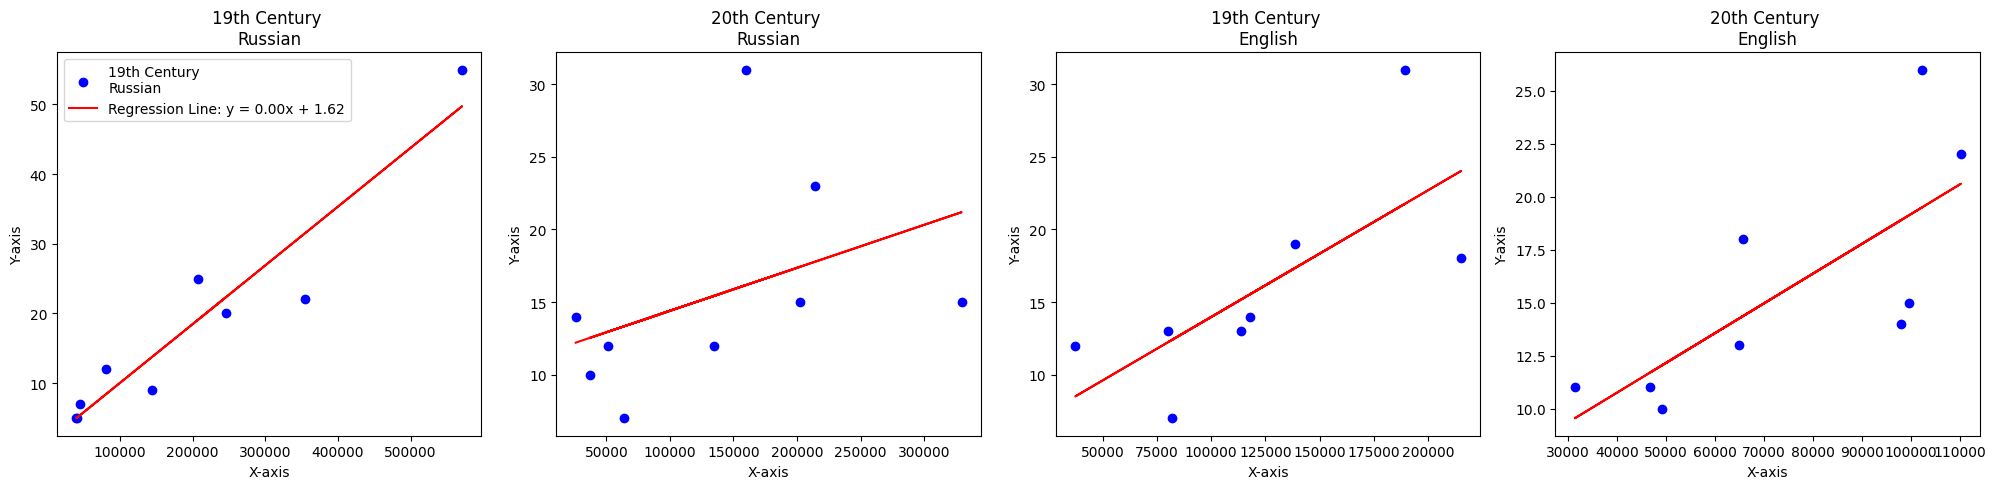

In [47]:
# Perform test and create scatterplots for all four groups of books, laying out # of characters and # of words

char_count_list_xlabel = "Groups"
char_count_list_ylabel = '# Of Words'
char_count_list_title = '# of Words per region and Period'

createSetOfScatterPlots(4, word_count_list, char_count_list, graph_labels, "Word Count", "Number of Characters")

As we can see, for all groups of books, there's a clear upward where larger books include more characters. Yet, there are difference in the steepness of the lines. 

When I assess the effects of region and period: 

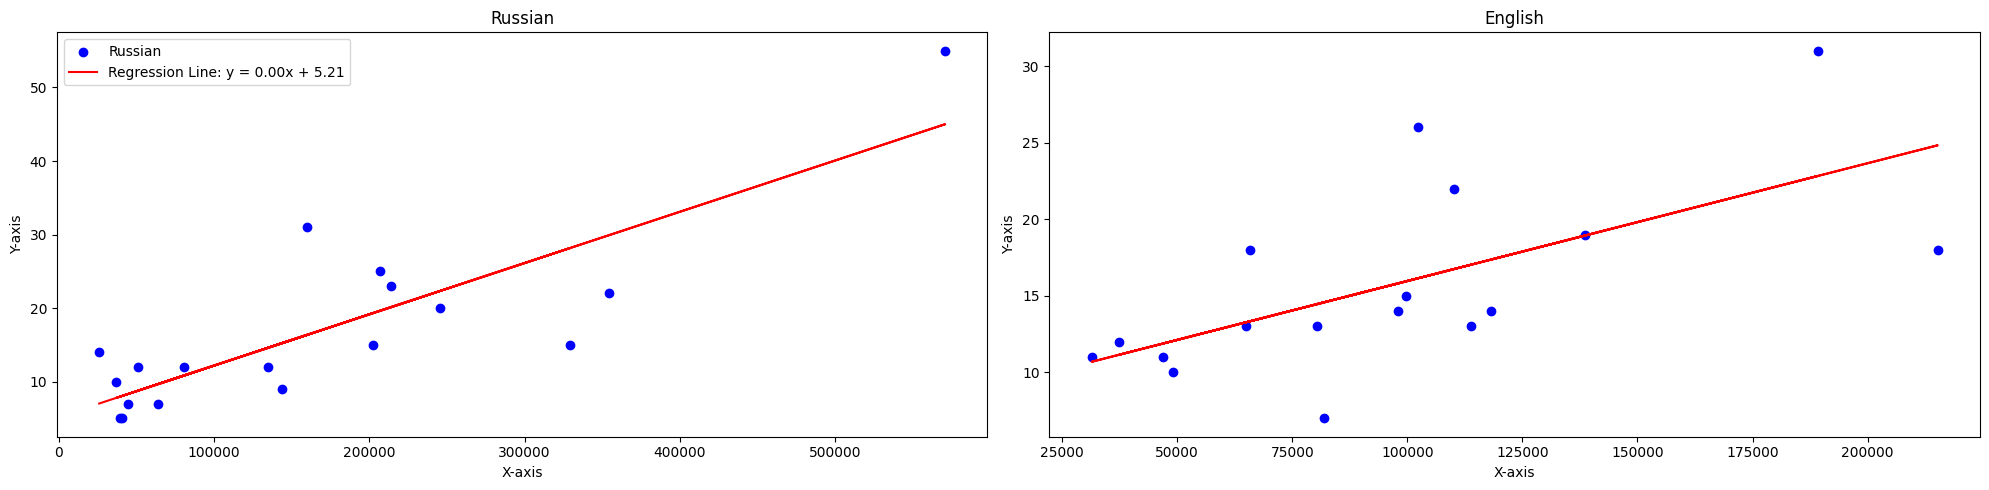

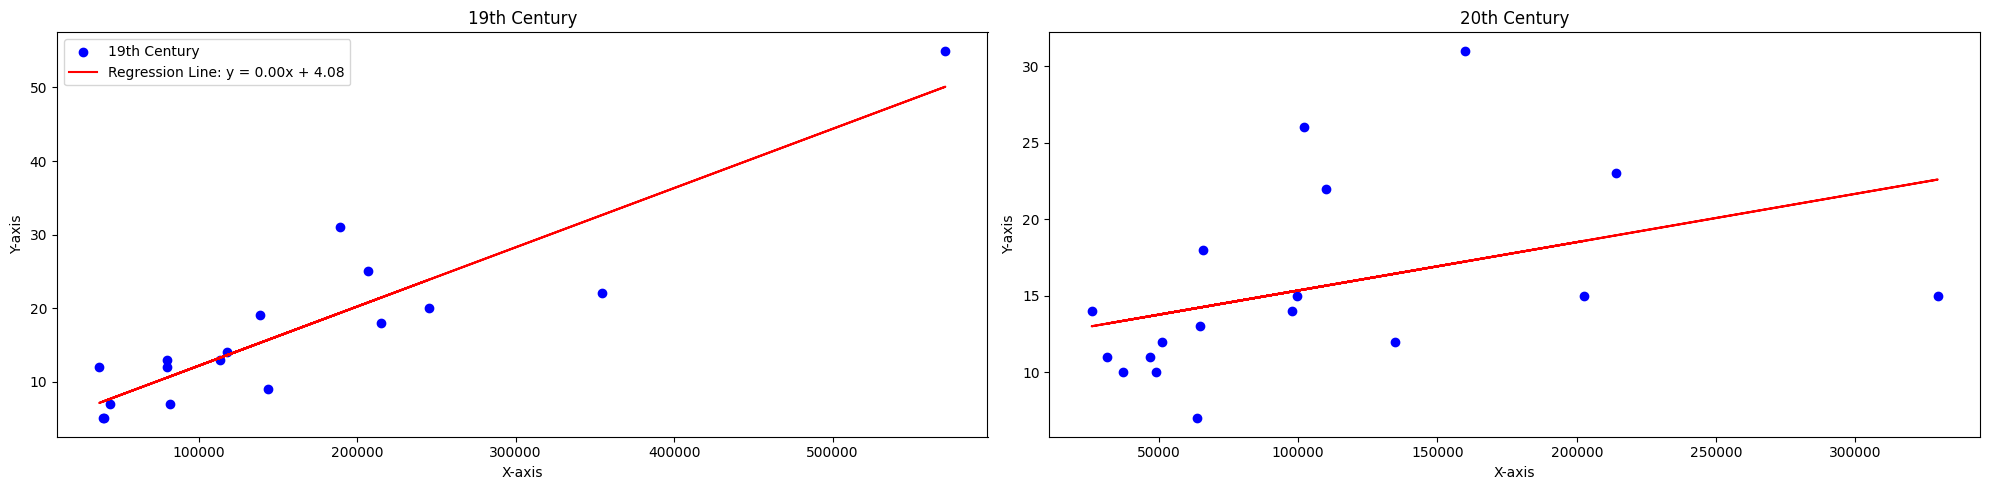

In [48]:
# Combine Russian and English groups
createSetOfScatterPlots(2, [word_count_list[0] + word_count_list[1], word_count_list[2] + word_count_list[3]], 
                        [char_count_list[0] + char_count_list[1], char_count_list[2] + char_count_list[3]], ["Russian", "English"], "Word Count", "Number of Characters")

# Combine 19th and 20th Century data
createSetOfScatterPlots(2, [word_count_list[0] + word_count_list[2], word_count_list[1] + word_count_list[3]], 
                        [char_count_list[0] + char_count_list[2], char_count_list[1] + char_count_list[3]], ["19th Century", "20th Century"], "Word Count", "Number of Characters")



It is clear that especially in the 20th century the line seems to be less steep, but starts at a much higher number of characters. So alongside the trend of less dialogue in the 20th century, the number of characters seems to have somewhat increased. The results steepness of the line for Russian and 19th century literature might also be explained by the presence of "War and Peace", a book with an incredible 55 characters across its more than 500.000 words. On a dataset of up to 20 values, such an entry has a significant effect. 

### Basic Statistics 4: Character Interactions
Characters, however, are not only present in the story, they usually also interact. Therefore, the next stat assessed is the number of character interactions. 

#### Method: Character interactions
Capturing character interactions is significantly easier than the previous steps. For this, I use a simplified method, where the presence of two characters in the same paragraph means that the characters interact. Here, I will count each one-to-one interaction, meaning that if three characters interact in a paragraph, this counts for 3 interactions: "A-B", "A-C" and "B-C". For this, the following method is used capturing all characters present in each paragraph.

In [25]:
import itertools

# Support function that checks if a word is a character and then returns the full character name.
def checkWordIsCharacter(word, character_dict):
    for name, array in character_dict.items():
        if word in array:
            #print(word + " + " + name)
            return name
    return ""

# Find all character interactions and their frequency in the book.
def getCharacterInteractions(book_dict, character_list):
    character_interactions_dict = {}
    # Go over each paragraph, line and word
    for par_index, paragraph in book_dict.items():
        character_paragraph_list = []
        for line_index, line in paragraph.items():
            for word in line.split():
                word = word.replace(",", "")
                # See if each word is actually the name of a character in the book
                name = checkWordIsCharacter(word, character_list)
                if name != "" and name not in character_paragraph_list:
                    # Create a list of all character names in a paragraph
                    character_paragraph_list.append(name)
        character_paragraph_list.sort()
        character_interactions_dict[par_index] = character_paragraph_list
    return character_interactions_dict

# Function to get one-to-one interactions, considering all permutations of interactons
def getOneonOneInteractions(character_interaction_dict):
    one_to_one_interaction_dict = {}
    for par_index, character_paragraph_list in character_interaction_dict.items():
        if len(character_paragraph_list) > 1:
            # Character inter
            for index in list(itertools.combinations(character_paragraph_list,2)):
                #index = tuple(character_paragraph_list)
                if index in one_to_one_interaction_dict.keys():
                    one_to_one_interaction_dict[index] += 1
                else:
                    one_to_one_interaction_dict[index] = 1
    # Sort list with number of interactions
    one_to_one_interaction_dict = {k: v for k, v in sorted(one_to_one_interaction_dict.items(), key=lambda item: item[1])}
    return one_to_one_interaction_dict

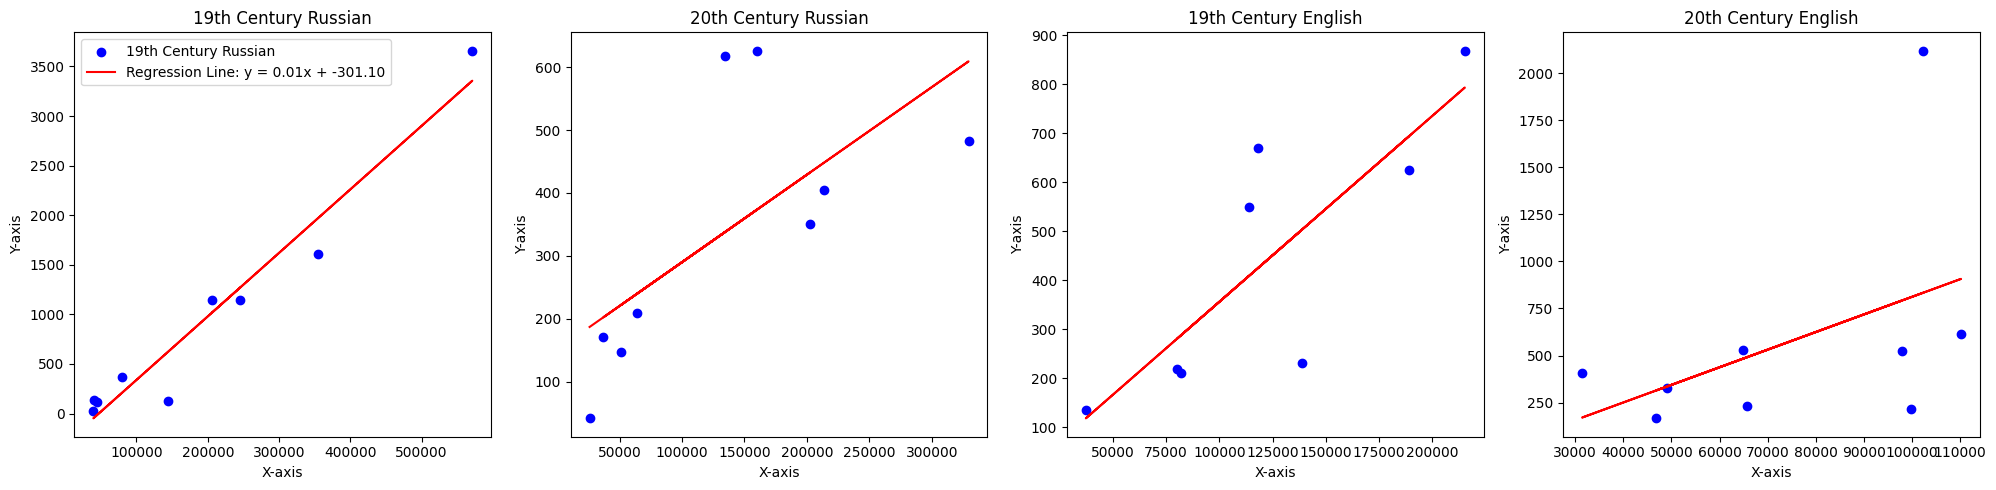

In [62]:
# Now actually perform the interaction analysis for all books.
russian_19th_century_char_interactions = {}
russian_20th_century_char_interactions = {}
english_19th_century_char_interactions = {}
english_20th_century_char_interactions = {}

russian_19th_century_char_list_dict = {}
russian_20th_century_char_list_dict = {}
english_19th_century_char_list_dict = {}
english_20th_century_char_list_dict = {}

character_interactions_count_list = [[],[],[],[]]
for name, book in russian_19th_century_books_dict.items():
    # First create a list of all characters in each paragraph
    interactions = getCharacterInteractions(book,russian_19th_century_char_dict[name])
    # Store this list for future reuse
    russian_19th_century_char_list_dict[name] = interactions
    # Then create a list with 1-to-1 character interactions (so if there are three characters, you will get: AB, AC, BC, as these are the character pairs that interacted)
    one_to_one_interactions = getOneonOneInteractions(interactions)
    # Store results for future re-use
    russian_19th_century_char_interactions[name] = one_to_one_interactions
    # Now create array with one-to-one interactions
    character_interactions_count_list[0].append(sum(one_to_one_interactions.values()))
for name, book in russian_20th_century_books_dict.items():
    interactions = getCharacterInteractions(book,russian_20th_century_char_dict[name])
    russian_20th_century_char_list_dict[name] = interactions
    # Then create a list with 1-to-1 character interactions (so if there are three characters, you will get: AB, AC, BC, as these are the character pairs that interacted)
    one_to_one_interactions = getOneonOneInteractions(interactions)
    russian_20th_century_char_interactions[name] = one_to_one_interactions
    character_interactions_count_list[1].append(sum(one_to_one_interactions.values()))
for name, book in english_19th_century_books_dict.items():
    interactions = getCharacterInteractions(book,english_19th_century_char_dict[name])
    english_19th_century_char_list_dict[name] = interactions
    one_to_one_interactions = getOneonOneInteractions(interactions)
    english_19th_century_char_interactions[name] = one_to_one_interactions
    character_interactions_count_list[2].append(sum(one_to_one_interactions.values()))
for name, book in english_20th_century_books_dict.items():
    interactions = getCharacterInteractions(book,english_20th_century_char_dict[name])
    english_20th_century_char_list_dict[name] = interactions
    one_to_one_interactions = getOneonOneInteractions(interactions)
    english_20th_century_char_interactions[name] = one_to_one_interactions
    character_interactions_count_list[3].append(sum(one_to_one_interactions.values()))

createSetOfScatterPlots(4, word_count_list, character_interactions_count_list, labels, "Word Count", "Number of Interactions")

Here we can see that especially for 19th century russian books the results are very extreme. with the smaller books approaching no more than 100 interactions, while the larger books can go up to 3.500 character interactions. Again, "war and Peace" is an extreme with its 3.500 character interactions, while also "Ulysses", a 20th Century English story, has over 2.000 character interactions. Particularly, leaving this story out, the number of character interactions seems nearly flat for 20th century english novels.

If we look per period and per region:

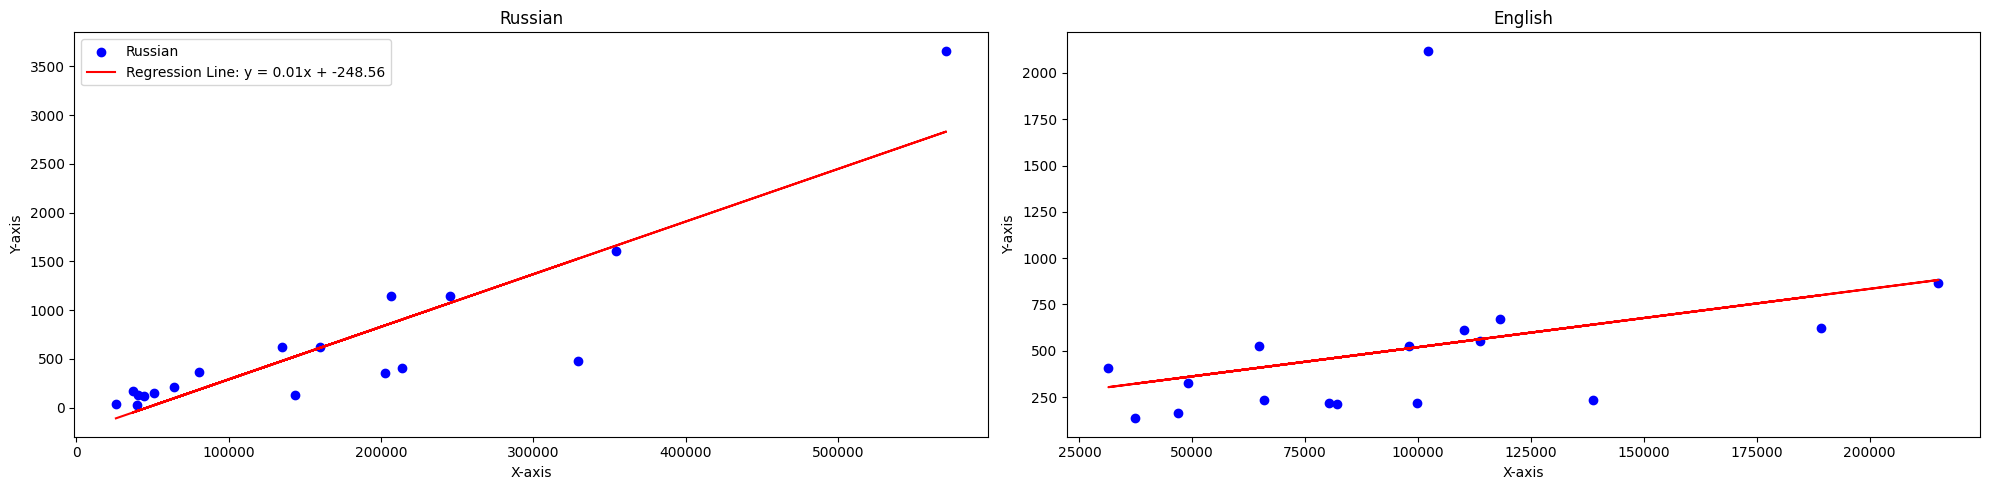

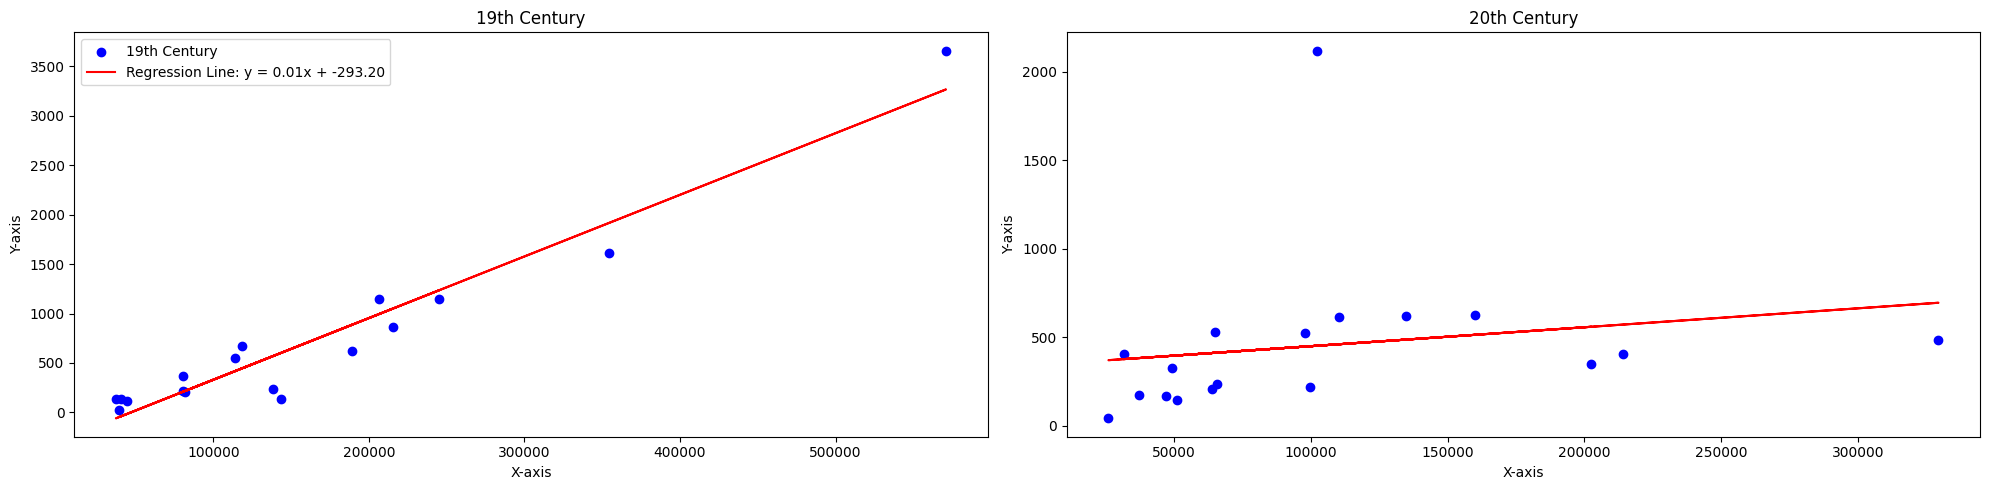

In [50]:
# Region
region_char_interaction_list = [character_interactions_count_list[0] + character_interactions_count_list[1], character_interactions_count_list[2] + character_interactions_count_list[3]]
createSetOfScatterPlots(2, region_word_count_list, region_char_interaction_list, region_word_count_list_labels, "Word Count", "Number of Interactions")

# Period 
period_char_interaction_list = [character_interactions_count_list[0] + character_interactions_count_list[2], character_interactions_count_list[1] + character_interactions_count_list[3]]
createSetOfScatterPlots(2, period_word_count_list, period_char_interaction_list, period_word_count_list_labels, "Word Count", "Number of Interactions")


Here we can see that both for English as well as 20th century literature, there's a much lower impact of an increase in total work count on character interactions.

**Add stats**

### Basic Statistics 5: Character Gender
The final metric I consider in the basic statistics chapter is the character gender. Here, again, significant support was provided by LLMs to collect a good dataset. 

#### Method: Gender Dataset
In this case, the character dictionaries described above are used as an input for a request to GPT 3.5 in ChatGPT to add character gender to the character names. In this way, all the gender for all the characters are captured in a dictionary like this. 
{
    "Full_name_of_character": True (True = Female, False = Male)
}

Again, the resulting dataset is very extensive in size therefore I will hide the field.

In [28]:
#Female Character Lists
female_char_dict_c_and_p = {
    'Kolya (Kid)': False, 
    'Mikolka (Painter)': False, 
    'Alyona Ivanovna' : True,
    'Arkady Ivanovitch': False,
    'Koch': False, 
    'Lida (Kid)': True,
    'Lebeziatnikov': False, 
    'Sonya': True,
    'Razumihkin': False,
    'Nikodim Fomitch': False,
    'Ilya Petrovitch': False,
    'Polenka (Kid)': False,
    'Dmitri (Patiner)' : False,
    'Lizaveta Ivanovna': True,
    'Nastasya': True,
    'Amalia Fyodorovna': True,
    'Zametov': False,
    'Zossimov': False,
    'Marfa Petrovna': True,
    'Luzhin': False,
    'Raskolnikov' : False,
    'Dunya': True,
    'Pulcheria': True,
    'Porfiry Petrovitch': False,
    'Katerina Ivanovna Marmeladov': True
}
female_char_dict_w_and_p = {
    "Pierre Bezukhov": False,
    "Andrew Bolkonski": False,
    "Natasha Rostova": True,
    "General Kutuzov": False,
    "Platon Karataev": False,
    "Anna Pavlovna Scherer": True,
    "Mary Bolkonskaya": True,
    "Mademoiselle Bourienne": True,
    "Julie Karagina": True,
    "Count Ilya Rostov": False,
    "Countess Natalya Rostova": True,
    "Nicholas Rostov": False,
    "Sonya Rostova": True,
    "Denisov": False,
    "Dolokhov": False,
    "Anatole Kuragin": False,
    "Helene Kuragina": True,
    "Boris Drubetskoy": False,
    "Berg": False,
    "Vera Rostova": True,
    "Hippolyte Kuragin": False,
    "Princess Drubetskaya": True,
    "Prince Vasili Kuragin": False,
    "Lise Bolkonskaya": True,
    "Pyotr Bezukhov": False,
    "Vasili Denisov": False,
    "Tikhon": False,
    "Mavra Kuzminishna": True,
    "Petya Rostov": False,
    "Timokhin": False,
    "Karataev's orderly": False,
    "Alpatych": False,
    "Balaga": False,
    "Davout": False,
    "Murat": False,
    "Napoleon Bonaparte": False,
    "Emperor Alexander": False,
    "Catiche": True,
    "Gerasim": False,
    "Mitenka": False,
    "Ramballe": False,
    "Tushin": False,
    "Vasilchikov": False,
    "Weyrother": False,
    "Bagration": False,
    "Barclay de Tolly": False,
    "Bennigsen": False,
    "Dokhturov": False,
    "Grouchy": False,
    "Kaysarov": False,
    "Kienmayer": False,
    "Kozlovsky": False,
    "Miloradovich": False,
    "Mortier": False,
    "Pfuel": False,
    "Platov": False,
    "Raevsky": False,
    "Schwarzenberg": False,
    "Tolstoy": False,
    "Uvarov": False,
}
female_char_dict_brothers_karamazov = {
    'Fyodor Pavlovich Karamazov': False,
    'Dmitri Karamazov': False,
    'Ivan Karamazov': False,
    'Alexei Karamazov': False,
    'Grushenka': True,
    'Katerina Ivanovna Verkhovtseva': True,
    'Smerdyakov': False,
    'Father Zosima': False,
    'Rakitin': False,
    'Ilyusha Snegiryov': False,
    'Kolya Krasotkin': False,
    'Lise Khokhlakov': True,
    'Lisaveta Smerdyashchaya': True,
    'Captain Snegiryov': False,
    'Madame Khokhlakov': True,
    'Agafya Tikhonovna': True,
    'Ippolit Kirillovich': False,
    'Kuzma Samsonov': False,
    'Lyagavy': False,
    'Herzenstube': False,
    'Miusov': False,
    'Nikolai Ivanov Krasotkin': False,
    'Pyotr Fomich Kalganov': False,
    'Sofya Ivanovna Svyatopolk-Mirskaya': True,
    'Trifon Borisovich': False,
    'Vrublevsky': False,
}
female_char_dict_dead_souls = {
    'Pavel Ivanovich Chichikov': False,
    'Selifan': False,
    'Nastasya Petrovna Korobotchkina': True,
    'Petrushka': False,
    'Nozdryov': False,
    'Manilov': False,
    'Lizanka': True,
    'Themistoclus': False,
    'Mihail Semyonovitch Sobakevitch': False,
    'Plyushkin': False,
    'Ivan Grigoryevitch': False,
    'Ivan Antonovitch': False,
    'The Governor': False,
    'The Governor’s Daughter': True,
    'Captain Kopeykin': False
}
female_char_dict_notes_from_underground = {
    'The Underground Man': False,
    'Liza': True,
    'Simonov': False,
    'Zverkov': False,
    'Ferfichkin': False,
    'Trudolyubov': False,
    'Apollon': False,
    'Anton Antonych Setochkin': False,
    'The Officer' : False
}
female_char_dict_the_duel = {
    'Ivan Andreitch (Vanya) Laevsky': False,
    '“Kolya” Von Koren': False,
    'Alexandr Daviditch Samoylenko': False,
    'Nadyezhda Fyodorovna': True,
    'Ilya Mihalitch Kirilin' : False
}
female_char_dict_eugene_onegin = {
    'Eugene Onegin': False,
    'Vladimir Lensky': False,
    'Tatyana Larina': True,
    'Olga Larina': True,
    'Filipyevna': True,
    'Monsieur Guillot': False,
    'Captain': False,
    'Zaretsky': False,
    'Triquet': False
}
female_char_dict_fathers_and_sons = {
    'Nikolai Petrovitch Kirsanov': False,
    'Arkady Nikolayevitch Kirsanov': False,
    'Bazarov': False,
    'Anna Sergeyevna Odintsova': True,
    'Yevgeny Vassilievitch Bazarov': False,
    'Arina Vlassevna Bazarov': True,
    'Pavel Petrovitch Kirsanov': False,
    'Fenichka': True,
    'Katerine Sergeyevna Lokteva (Katya)': True,
    'Prokofitch': False,
    'Viktor Sitnikov': False,
    'Avdotya Nikitishna Kukshina': True,
    'Mitya': False,
    'Dunyasha': True,
    'Princess Abdotya Stepanovna': True,
    'Matvei Ilyich Kolyazin': False,
    'Porfiry Platonovitch': False,
    'Fedka': False,
    'Piotr': False
}
female_char_dict_the_idiot = {
    'Prince Lev Nikolayevich Myshkin': False,
    'Aglaya Ivanovna Epanchina': True,
    'Alexandra Ivanovna Epanchin': True,
    'Adelaida Ivanovna Epanchin': True,
    'Nastasya Filippovna Barashkova': True,
    'Parfyon Semyonovich Rogozhin': False,
    'Gavrila Ardalionovich Ivolgin': False,
    'Lizaveta Prokofyevna Yepanchina': True,
    'General Ivan Fyodorovich Epanchin': False,
    'Varvara Ardalionovna Ivolgina': True,
    'Afanasy Ivanovich Totsky': False,
    'Ippolit Terentyev': False,
    'Ferdyschenko': False,
    'Keller': False,
    'Lukyan Timofeevich Lebedev': False,
    'Antip Burdovsky': False,
    'General Ardalion Alexandrovich Ivolgin': False,
    'Darya Alexeyevna': True,
    'Yevgeny Pavlovich Radomsky': False,
    'Ferdyshchenko': False,
    'Ivan Petrovich Ptitsyn': False,
    'Anna Fedorovna': True,
    'Lukyan Timofeevich Lebedyev': False,
    'Vera Lebedyev': True,
    'Mrs. Nina Alexandrovna Ivolgin': True,
    'Mavra': True,
    'Mrs. Terentyev': True,
    'Kolya Ivolgin': False,
    'Princess Belokonsky': True
}

russian_19th_century_char_gender_dict = {
    "Brothers Karamazov": female_char_dict_brothers_karamazov,
    "War and Peace" : female_char_dict_w_and_p,
    "Crime and Punishment" : female_char_dict_c_and_p,
    "Dead Souls": female_char_dict_dead_souls,
    "Notes from the Underground": female_char_dict_notes_from_underground,
    "The Duel" : female_char_dict_the_duel,
    "Eugene Onegin": female_char_dict_eugene_onegin,
    "Fathers and Sons": female_char_dict_fathers_and_sons,
    "The Idiot": female_char_dict_the_idiot
}

female_char_dict_mother = {
    'Pelagueya Nilovna Vlasova': True,
    'Michael Vlasov': False,
    'Pavel Vlasov': False,
    'Little Russian': False,
    'Alexey Ivanovich': False,
    'Andrey': False,
    'Sashenka': True,
    'Natasha': True,
    'Vyesovshchikov': False,
    'Rybin': False,
    'Nikolay Ivanovich': False,
    'Sofya Ivanovich': True
}
female_char_dict_ivan = {
    'Ivan Denisovich Shukhov': False,
    'Tyurin': False,
    'Tsezar': False,
    'Fetyukov': False,
    'Alyoshka': False,
    'Pavlo': False,
    'Kolya Vdovushkin': False,
    'Buynovsky': False,
    'Gopchik': False,
    'Eino': False,
    'Kildigs': False,
    'Snub Nose': False
}
female_char_dict_zhivago = {
    'Yuri Zhivago': False,
    'Larisa Fyodorovna Antipova': True,
    'Viktor Komarovsky': False,
    'Tonya Gromeko': True,
    'Pasha Antipov': False,
    'Alexander Alexandrovich': False,
    'Anna Ivanovna Gromeko': True,
    'Evgraf Zhivago': False,
    'Misha Gordon': False,
    'Marya Nikolaevna Zhivago': True,
    'Nikolai Nikolaevich Vedenyapin': False,
    'Amalia Yefimovna Guichard': True,
    'Ivan Ivanovich Voskoboinikov': False,
    'Sasha': True,
    'Tonia': True,
    'Seryozha': True,
    'Nika Dudorov': False,
    'Daria': True,
    'Makarych': False,
    'Kostoyed': False,
    'Kolya': False,
    'Maksik': False,
    'Kapitolina': True,
    'Klavdia': True,
    'Zinaida': True,
    'Vasya': True,
    'Rodion': False
}
female_char_dict_heart_of_a_dog = {
    'Sharik / Polygraph Polygraphovich Sharikov': False,
    'Professor Philip Philippovich Preobrazhensky': False,
    'Dr. Ivan Arnoldovich Bormenthal': False,
    'Shvonder': False,
    'Darya Petrovna Ivanova': True,
    'Fyodor': False,
    'Klim Grigorievich Chugunkin': False,
    'Vasnetsova': True,
    'Zinaida (Zina) Prokofievna Bunina': True,
    'Vyazemskaya': True
}
female_char_dict_life_and_fate = {
    'Viktor Pavlovich Strum': False,
    'Lyudmila Afanasyevna': True,
    'Viktor Shtrum\'s father': False,
    'Nadya Nikolayevna': True,
    'Alexandra Vladimirovna': False,
    'Yevgenia Nikolaevna Shaposhnikova': True,
    'Ivan Grigoryevich Novikov': False,
    'Antonina Sergeyevna': True,
    'Dementiy Trifonovich Getmanov': False,
    'Abarchuk': False,
    'Pyotr Lavrentyevich Sokolov': False,
    'Mikhail Sidorovich Mostovskoy': False,
    'Sofya Osipovna Levinton': True,
    'Captain Grekov': False,
    'Nikolay Grigorevich Krymov': False,
    'Colonel Pyotr Pavlovich Novikov': False
}
female_char_dict_petersburg = {
    'Nikolai Apollonovich Ableukhov': False,
    'Apollon Apollonovich Ableukhov': False,
    'Anna Petrovna Ableukhova': True,
    'Sofya Petrovna Likhutina': True,
    'Mavrushka': False,
    'Sergei Sergeyevich Likhutin': False,
    'Nikolai Stepanovich Lippanchenko': False,
    'Varvara Yevgrafovna Solovyova': True,
    'Nikolai Petrovich Tsukatov': False,
    'Lyubov\' Alekseyevna Tsukatova': True,
    'Leib Hussar Shporyshev': False,
    'Baron Ommau-Ommergau': False,
    'Count Aven': False,
    'Herman Hermanovich Verhefden': False,
    'Aleksandr Ivanovich Dudkin': False,
    'Zoya Zakharovna Fleisch': True,
    'Pavel Yakovlevich Morkovin or Voronkov': False,
    'Mindalini': True,
    'Matvei Morzhov': False,
    'Dmitrich Semyonych': False,
    'Ivan Ivanych Ivanov': False,
    'Bessmertny': False,
    'Neintelpfain': False,
    'Stepan Styopka': False,
    'Grishka': False
}
female_char_dict_we = {
    'D-503': False,
    'I-330': True,
    'O-90': True,
    'S-4711': False,
    'U': False,
    'R-13': False,
    'The Benefactor': False,
    'The Skinny Doctor': False,
    'D-503\'s Neighbor': False,
    'Second Doctor': False,
    'Second Builder': False,
    'Old Woman': True
}
female_char_dict_master_margarita = {
    'Woland': False,
    'Margarita': True,
    'The Master': False,
    'Behemoth': False,
    'Azazello': False,
    'Koroviev': False,
    'Ivan Ponyrev': False,
    'Pontius Pilate': False,
    'Yeshua Ha-Notsri': False,
    'Natasha': True,
    'Nikanor Ivanovich': False,
    'Fagotto': False,
    'Abadonna': False,
    'Aloysius Mogarych': False,
    'Annushka': True,
    'Baron Meigel': False,
    'Begemot': False,
    'Bengalsky': False,
    'Mikhael Alexandrovich Berlioz': False,
    'Bulgakov': False,
    'Dr. Stravinsky': False,
    'Matthew Levi': False,
    'Styopa Likhodeev': False,
    'Hella': True,
    'Nikolai Ivanovich': False,
    'Grigory Danilovich Rimsky': False,
    'Judas of Kiriath': False,
    'Joseph Kaifa': False,
    'Banga': False,
    'Frieda': True,
    'Bar-Rabban': False,
    'Alexander Riukhin': False,
    'Maximillian Andreevich Poplavsky': False,
    'Arkady Apollonovich': False,
    'Aloisy Mogarych': False,
    'Andrei Fokich Sokov': False
}
female_char_dict_life_of_insects = {
    'Arthur': False,
    'Arnold': False,
    'Sam': False,
    'Archibald': False,
    'Father scarab beetles': False,
    'Son scarab beetles': False,
    'Marina': True,
    'Nikolai': False,
    'Natasha': True,
    'Maxim': False,
    'Nikita': False,
    'Dima': False,
    'Mitya': False,
    'Seryozha': False
}

russian_20th_century_char_gender_dict = {
    "Mother": female_char_dict_mother,
    "A Day in the Life of Ivan Denisovich": female_char_dict_ivan,
    "Dr. Zhivago": female_char_dict_zhivago,
    "Heart of a Dog": female_char_dict_heart_of_a_dog,
    "Life and Fate": female_char_dict_life_and_fate,
    "The Life of Insects": female_char_dict_life_of_insects,
    "Petersburg": female_char_dict_petersburg,
    "We": female_char_dict_we,
    "The Master and Margarita" : female_char_dict_master_margarita,
}

female_char_dict_portrait = {
  'Dorian Gray': False,
  'Lord Henry Wotton': False,
  'Basil Hallward': False,
  'Sibyl Vane': True,
  'James Vane': False,
  'Alan Campbell': False,
  'Mrs. Vane': True,
  'Lady Agatha': True,
  'Lady Brandon': True,
  'Victoria Wotton': True,
  'Lady Narborough': True,
  'Duchess of Harley': True,
  'Lady Alice Chapman': True,
  'Mrs. Leaf': True
}
female_char_dict_expectations = {
  'Pip Pirrip': True,  # Female (Pip)
  'Abel Magwitch': False,  # Male
  'Estella Havisham': True,  # Female (Estella, Havisham)
  'Joe Gargery': False,  # Male
  'Biddy': True,  # Female
  'Wemmick': False,  # Male
  'Mrs. Joe Gargery': True,  # Female (Mrs. Joe)
  'Compeyson': False,  # Male
  'Herbert Pocket': False,  # Male
  'Mr. Jaggers': False,  # Male
  'Orlick': False,  # Male
  'Bentley Drummle': False,  # Male
  'Startop': False,  # Male
  'Clara Barley': True,  # Female (Clara)
  'Molly': True,  # Female
  'Arthur Havisham': False,  # Male
  'Sarah Pocket': True,  # Female (Sarah)
  'Camilla': True,  # Female
  'Raymond': False,  # Male
  'Mrs. Coiler': True,  # Female (Mrs. Coiler)
  'Mr. Wopsle': False,  # Male
  'Dolge Orlick': False,  # Male
  'Georgiana': True,  # Female
  'Miss Skiffins': True,  # Female (Miss Skiffins)
  'Clarriker': False,  # Male
  'Trabb\'s Boy': False,  # Male
  'Trabb': False,  # Male
  'Uncle Pumblechook': False,  # Male
  'Barnard': False,  # Male
  'Brandley': False,  # Male
  'Cousin Raymond': False,  # Male
  'Drummle': False,  # Male
  'Fisher': False,  # Male
  'Gruffandgrim': False,  # Male
  'Hubble': False,  # Male
  'Jerry': False,  # Male
  'Mr. Campbell': False,  # Male
  'Mr. Hubble': False,  # Male
  'Mr. James Harthouse': False,  # Male
  'Mr. Matthew Pocket': False,  # Male
  'Mr. Trabb': False,  # Male
  'Mrs. Pocket': True,  # Female (Mrs. Pocket)
  'Parker': False,  # Male
  'Sarah': True,  # Female
  'Sophia': True,  # Female
  'The Avenger': False,  # Male
  'The Aged Parent': False,  # Male
}

female_char_dict_heights = {
  'Heathcliff': False,
  'Catherine Earnshaw': True,
  'Edgar Linton': False,
  'Nelly Dean': True,
  'Hindley Earnshaw': False,
  'Isabella Linton': True,
  'Frances Earnshaw': True,
  'Hareton Earnshaw': False,
  'Catherine Linton': True,
  'Mr. Lockwood': False,
  'Mr. Earnshaw': False,
  'Mrs. Earnshaw': True,
  'Joseph': False,
  'Zillah': True,
  'Mr. Green': False
}
female_char_dict_cities = {
  'Charles Darnay': False,
  'Sydney Carton': False,
  'Doctor Manette': False,
  'Lucie Manette': True,
  'Monsieur Defarge': False,
  'Madame Defarge': True,
  'Jarvis Lorry': False,
  'Marquis St. Evrémonde': False,
  'Jerry Cruncher': False,
  'Miss Pross': True,
  'John Barsad': False,
  'Roger Cly': False,
  'Gaspard': False,
  'The Vengeance': True,
  'Old Foulon': False,
  'Young Jerry': False,
  'Solomon Pross': False,
  'Stryver': False,
  'Gabelle': False,
  'The Seamstress': True,
  'C. J. Stryver': False
}
female_char_dict_worlds = {
  'The Narrator': False,
  'The Martians': False,
  'The Artilleryman': False,
  'The Curate': False,
  'The Narrator’s Brother': False,
  'The Narrator’s Wife': True,
  'Ogilvy': False,
  'Mrs. Elphinstone': True,
  'The Innkeeper': True,
  'Stent': False,
  'Lord Hilton': False,
  'Henderson': False
}
female_char_dict_huck_finn = {
  'Huckleberry “Huck” Finn': False,
  'Jim': False,
  'Tom Sawyer': False,
  'Pap Finn': False,
  'Widow Douglas': True,
  'Miss Watson': True,
  'Judge Thatcher': False,
  'Grangerfords': False,
  'The Wilks Family': False,
  'Silas Phelps': False,
  'Sally Phelps': True,
  'Aunt Polly': True,
  'The duke and the dauphin': False
}
female_char_dict_scarlet_letter = {
  'Hester Prynne': True,
  'Arthur Dimmesdale': False,
  'Roger Chillingworth': False,
  'Pearl': True,
  'Governor Bellingham': False,
  'Mistress Hibbins': True,
  'Reverend Mr. John Wilson': False
}
female_char_dict_moby_dick = {
  'Ishmael': False,
  'Captain Ahab': False,
  'Moby Dick': False,
  'Queequeg': False,
  'Starbuck': False,
  'Stubb': False,
  'Flask': False,
  'Daggoo': False,
  'Tashtego': False,
  'Pip': False,
  'Fedallah': False,
  'Captain Boomer': False,
  'Father Mapple': False,
  'Captain Bildad': False,
  'Captain Peleg': False,
  'Elijah': False,
  'Gabriel': False,
  'Bulkington': False
}

english_19th_century_char_gender_dict = {
    "Picture of Dorian Gray" : female_char_dict_portrait, 
    "Great Expectations": female_char_dict_expectations, 
    "Wuthering Heights": female_char_dict_heights, 
    "Tale of Two Cities": female_char_dict_cities,
    "War of the Worlds": female_char_dict_worlds,
    "The Adventures Of Huckleberry Finn": female_char_dict_huck_finn,
    "Scarlet Letter": female_char_dict_scarlet_letter,
    "Moby Dick": female_char_dict_moby_dick
}

female_char_dict_mockingbird = {
    'Scout Finch': True,
    'Atticus Finch': False,
    'Jem Finch': False,
    'Boo Radley': False,
    'Calpurnia': True,
    'Bob Ewell': False,
    'Mayella Ewell': True,
    'Tom Robinson': False,
    'Aunt Alexandra': True,
    'Dill Harris': False,
    'Miss Maudie Atkinson': True,
    'Heck Tate': False,
    'Link Deas': False,
    'Mrs. Dubose': True,
    'Nathan Radley': False,
    'Walter Cunningham': False,
    'Mr. Gilmer': False,
    'Judge Taylor': False,
    'Reverend Sykes': False,
    'Helen Robinson': True,
    'Mr. Underwood': False,
    'Stephanie Crawford': True,
    'Mr. Avery': False,
    'Mrs. Merriweather': True,
    'Mr. Dolphus Raymond': False,
    'Miss Caroline Fisher': True
}
female_char_dict_1984 = {
    'Winston Smith': False,
    'Julia': True,
    'O\'Brien': False,
    'Big Brother': False,
    'Emmanuel Goldstein': False,
    'Syme': False,
    'Mrs. and Tom Parsons': True,
    'Charrington': False,
    'Katharine Smith': True,
    'Martin': False,
    'Ampleforth': False,
    'Jones': False,
    'Aaronson': False,
    'Rutherford': False,
    'Ursula': True,
    'Tillotson': False
}
female_char_dict_brave_new_world = {
    'John the Savage': False,
    'Bernard Marx': False,
    'Helmholtz Watson': False,
    'Mustapha Mond': False,
    'Lenina Crowne': True,
    'Linda': True,
    'The Director': False,
    'Fanny Crowne': True,
    'Henry Foster': False,
    'Benito Hoover': False,
    'Polly Trotsky': True,
    'Darwin Bonaparte': False,
    'Mitsima': False,
    'The Arch-Community-Songster': False,
    'Popé': False,
    'The Warden': True,
    'Miss Keate': True,
    'Miss Watson': True,
    'Dr. Shaw': True
}
female_char_dict_fahrenheit_451 = {
    'Guy Montag': False,
    'Mildred Montag': True,
    'Captain Beatty': False,
    'Professor Faber': False,
    'Clarisse McClellan': True,
    'Granger': False,
    'Mrs. Bowles': True,
    'Mrs. Phelps': True,
    'Stoneman': False,
    'Black': False,
    'Mechanical Hound': False
}
female_char_dict_handmaids_tale = {
    'Offred': True,
    'The Commander': False,
    'Serena Joy': True,
    'Moira': True,
    'Aunt Lydia': True,
    'Janine': True,
    'Rita': True,
    'Nick': False,
    'Luke': False,
    'Ofglen': True,
    'Emily': True,
    'Elizabeth': True,
    "Offred's Mother": True,
    "Cora" : True,
    "Professor Pieixoto": False
}
female_char_dict_flies = {
    'Ralph': False,
    'Piggy': False,
    'Jack': False,
    'Simon': False,
    'Roger': False,
    'Samneric': False,
    'Maurice': False,
    'Robert': False,
    'Bill': False,
    'Henry': False,
    'Percival': False,
    'Johnny': False,
    'Wilfred': False,
    'Naval Officer': False
}
female_char_dict_mice = {
    'Lennie': False,
    'George': False,
    'Candy': False,
    'Curley’s wife': True,
    'Crooks': False,
    'Curley': False,
    'Slim': False,
    'Carlson': False,
    'The Boss': False,
    'Aunt Clara': True,
    'Whit': False
}
female_char_dict_night = {
    'Dick Diver': False,
    'Nicole Diver': True,
    'Rosemary Hoyt': True,
    'Tommy Barban': False,
    'Abe North': False,
    'Mary North': True,
    'Baby Warren': True,
    "Franz Gregorovius or Dr. Gregory": False,
    'Devereux Warren': False,
    'Albert McKisco': False,
    'Violet McKisco': True,
    'Collis Clay  ': False,
    'Mrs. Speers': True,
    'Lady Caroline': True,
    'Conte di Minghetti': False,
    'Earl Brady': False,
    'Campion': False,
    'Jules Peterson': False,
    'Maria Wallis': True,
    'Prince Chillicheff': False,
    'Dr. Dohmler': False,
    'Lanier': False,
    'Topsy': False
}
female_char_dict_gatsby = {
    'Jay Gatsby': False,
    'Nick Carraway': False,
    'Daisy Buchanan': True,
    'Tom Buchanan': False,
    'Jordan Baker': True,
    'Myrtle Wilson': True,
    'George Wilson': False,
    'Meyer Wolfsheim': False,
    'Owl Eyes': False,
    'Klipspringer': False
}

english_20th_century_char_gender_dict = {   
    "To Kill a Mockingbird": female_char_dict_mockingbird,
    "1984" : female_char_dict_1984,
    "A Brave New World" : female_char_dict_brave_new_world,
    "Fahrenheit 451": female_char_dict_fahrenheit_451,
    "Handmaid's Tale": female_char_dict_handmaids_tale,
    "Lord of the Flies": female_char_dict_flies,
    "Of Mice and Men" : female_char_dict_mice,
    "Tender is the Night": female_char_dict_night,
    "The Great Gatsby" : female_char_dict_gatsby,
}

To create the stats for the gender of the character in the story, we will first validate the presence of each character in the story and then determine the gender ratio:

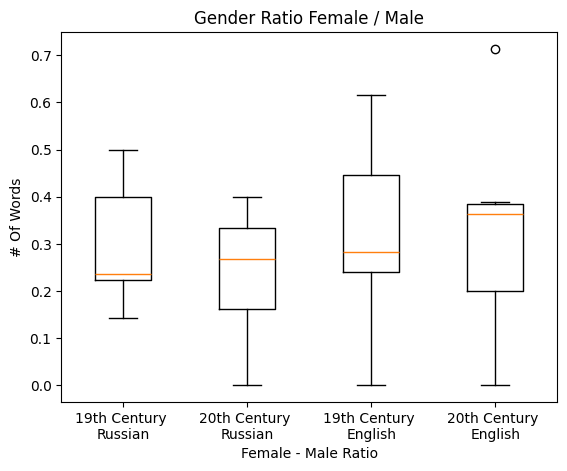

In [29]:
gender_ratio_list = [[],[],[],[]]
for name, char_freq in russian_19th_century_char_freq.items():
    female = 0
    for char in char_freq.keys():
        if russian_19th_century_char_gender_dict[name][char]:
            female += 1
    gender_ratio_list[0].append(female / len(char_freq.keys()))
for name, char_freq in russian_20th_century_char_freq.items():
    female = 0
    for char in char_freq.keys():
        if russian_20th_century_char_gender_dict[name][char]:
            female += 1
    gender_ratio_list[1].append(female / len(char_freq.keys()))
for name, char_freq in english_19th_century_char_freq.items():
    female = 0
    for char in char_freq.keys():
        if english_19th_century_char_gender_dict[name][char]:
            female += 1
    gender_ratio_list[2].append(female / len(char_freq.keys()))
for name, char_freq in english_20th_century_char_freq.items():
    female = 0
    for char in char_freq.keys():
        if english_20th_century_char_gender_dict[name][char]:
            female += 1
    gender_ratio_list[3].append(female / len(char_freq.keys()))

createBoxPlot(gender_ratio_list, graph_labels, "Female - Male Ratio", word_count_list_ylabel, "Gender Ratio Female / Male")


As one can see, there's a majority of male characters in books from all groups. Only 19th and 20th century English books include some books with more males than females. The outlier, with more than 70% female is "The Handmaid's Tale" by Maragret Atwood.

There results per region and period look as follows:



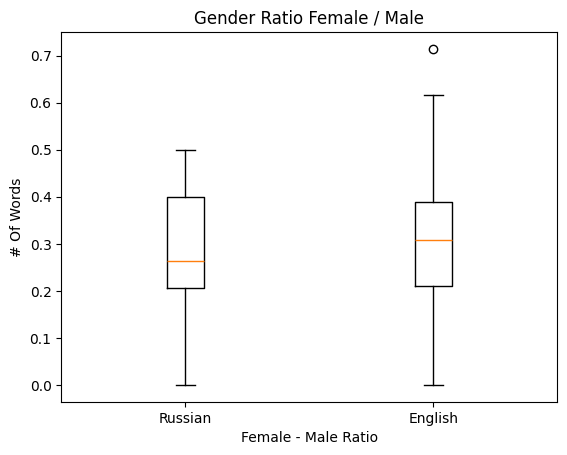

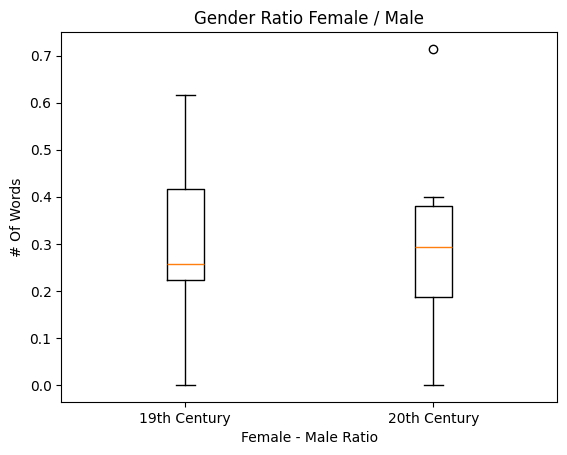

Test if there's a significant difference across regions.
0.6726332461425194
P-Value = 0.418019835331352
Fail to reject the null hypothesis. No significant difference detected between the regions.
Test if there's a significant difference across periods.
0.24425500112693976
P-Value = 0.6244236707179724
Fail to reject the null hypothesis. No significant difference detected between the periods.


In [30]:
createBoxPlot([gender_ratio_list[0] + gender_ratio_list[1], gender_ratio_list[2] + gender_ratio_list[3]], ["Russian", "English"], "Female - Male Ratio", word_count_list_ylabel, "Gender Ratio Female / Male")

createBoxPlot([gender_ratio_list[0] + gender_ratio_list[2], gender_ratio_list[1] + gender_ratio_list[3]], ["19th Century", "20th Century"], "Female - Male Ratio", word_count_list_ylabel, "Gender Ratio Female / Male")

# Run the Anova test to validate if there is significant difference.
print("Test if there's a significant difference across regions.")
statistic, p_value = f_oneway(gender_ratio_list[0] + gender_ratio_list[1], gender_ratio_list[2] + gender_ratio_list[3])
print(statistic)
print("P-Value = " + str(p_value))

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the regions")
else:
    print("Fail to reject the null hypothesis. No significant difference detected between the regions.")

# Run the Anova test to validate if there is significant difference.
print("Test if there's a significant difference across periods.")
statistic, p_value = f_oneway(gender_ratio_list[0] + gender_ratio_list[2], gender_ratio_list[1] + gender_ratio_list[3])
print(statistic)
print("P-Value = " + str(p_value))

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the periods")
else:
    print("Fail to reject the null hypothesis. No significant difference detected between the periods.")

Also here, there seems to be no significant differences in the ratio of male vs. female characters. 

## Character Maps

Beyond basic statistics, there various methods described earlier can be used for more complex analysis. 

One way is to create maps that capture all the characters, their interactions and the frequency of their interactions. You can see some examples of these graphs below. As described by Bonato et al. (2016) character maps can be very valuable in understanding and comparing various pieces of literature, the placement, of characters, their intensity of interaction with other characters and the common interaction between side-characters. This can provide interesting insights on what differentiates books. For example, a closely tied net of characters that interact often might fit a more structured, small-world author, while many loosely tied characters represent large-world stories, possibly written by less structured authors. 

*Note that the use of Plotly to generate graphs for Github readme's does not work correctly, therefore, I have manually updated the readme to include screenshots of the interactive character plots. These interactive plots can still be generated by running the code in Jupyter.*

In [31]:
import networkx as nx

def createGraph(character_dict, interaction_dict):
    #Create Graph
    G = nx.DiGraph()

    nodes_and_labels = {}
    for index, character in enumerate(character_dict.keys()):
        nodes_and_labels[index] = character

    G.add_nodes_from(nodes_and_labels)

    weighted_edges = []
    for interaction, frequency in interaction_dict.items():
        node0 = list(nodes_and_labels.keys())[list(nodes_and_labels.values()).index(interaction[0])]
        node1 = list(nodes_and_labels.keys())[list(nodes_and_labels.values()).index(interaction[1])]
        edge = (node0, node1, frequency)
        weighted_edges.append(edge)
    #print(weighted_edges)

    G.add_weighted_edges_from(weighted_edges)

    pos = nx.kamada_kawai_layout(G)

    fig = go.Figure()

    for node, label in nodes_and_labels.items():
        x, y = pos[node]
        fig.add_trace(go.Scatter(x=[x], y=[y], text=label, mode="markers+text", name=label, marker=dict(size=20)))

    # Add edges
    edge_trace = []
    for edge in G.edges(data=True):
        if edge[2]['weight'] > 0:
            char_1 = edge[0]
            char_2 = edge[1]

            x0, y0 = pos[char_1]
            x1, y1 = pos[char_2]

            text   = str(char_1) + '--' + str(char_2) + ': ' + str(edge[2]['weight'])
            
            trace  = go.Scatter(x = [x0, x1, None], y = [y0, y1, None], line = dict(width=0.3*edge[2]['weight']**0.2,color='cornflowerblue'), hoverinfo= 'text', text = ([text]), mode='lines'
                                )

            edge_trace.append(trace)

    for trace in edge_trace:
        fig.add_trace(trace)
    # Update layout
    fig.update_layout(showlegend=False)
    fig.update_layout(title='Interactive Features', width=500, height=500, 
                  margin=dict(l=50, r=50, b=100, t=100, pad=4),
                  font=dict(family='Courier New, monospace', size=18, color='#7f7f7f'),
                  xaxis=dict(showgrid=False, zeroline=False),
                  yaxis=dict(showgrid=False, zeroline=False),
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)',
                  hovermode='closest')
    fig.show()

In [2]:

# Because of space and runtime considerations, I generate four example graphs, one for each group
createGraph(russian_19th_century_char_freq["Notes from the Underground"], russian_19th_century_char_interactions["Notes from the Underground"])
createGraph(russian_20th_century_char_freq["Heart of a Dog"], russian_20th_century_char_interactions["Heart of a Dog"])
createGraph(english_19th_century_char_freq["Picture of Dorian Gray"], english_19th_century_char_interactions["Picture of Dorian Gray"])
createGraph(english_20th_century_char_freq["1984"], english_20th_century_char_interactions["1984"])

# Remove commented section here to generate all interactive maps
#for name in russian_19th_century_books_dict.keys():
#    createGraph(russian_19th_century_char_freq[name], russian_19th_century_char_interactions[name])
#for name in russian_20th_century_books_dict.keys():
#    createGraph(russian_20th_century_char_freq[name], russian_20th_century_char_interactions[name])
#for name in english_19th_century_books_dict.keys():
#    createGraph(english_19th_century_char_freq[name], english_19th_century_char_interactions[name])
#for name in english_20th_century_books_dict.keys():
#    createGraph(english_20th_century_char_freq[name], english_20th_century_char_interactions[name])

Without being an expert such graphs are not easily interpretable. However, for both Russian books, we can see a more central place for the main character, placed on more on the outskirts of the graph with connections to every other character, while other characters seem less directly connected. This points to more 1-on-1 interactions with the side characters, in contrast to English books which appear to have 3-4-5 person interactions, making the characters more centrally placed. 

## Tweaked Bechdel-Wallace test.
As the final topic of the Data Practical, I will describe the analysis of books using a slightly tweaked Bechdel-Wallace test. The Bachdel-Wallace test is a test of female gender representation in various forms of entertainment, for example in books or films (Appel and Gnambs, 2023). The test breaks down to the following question: "Are two or more named women present in a book, and do they talk to each other about something besides a man?"

Programatically this question is not easy to answer, especially the final requirement "do they talk to each other about something besides a man", is hard to validate given the large variety of words that could be used to refer to a man in each book. Therefore, my analysis of the Bechdel-Wallace test (a.k.a. the "Tweaked Bechdel-Wallace test") tests the following requirements:

*Requirements:*
1. Does the book have two named female characters?
2. Do the females interact?
3. Is there no men involved in the interaction?

A programmatic analysis of this test will result in listing those books that have a scene that only includes two named female characters speaking, and which does not include a third-men either involved or mentioned by name in the conversation. However, it can not be excluded that a man is nevertheless referenced through pronouns or other references. 

The three requirements have been modelled below through a three-step funnel.

In [67]:
# A function for loading the funnel visual
def plot_funnel(data):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plotting the funnel steps
    ax.plot(data, marker='o', color='b', linestyle='-')

    # Adding labels and title
    ax.set_xlabel('Steps')
    ax.set_ylabel('# of books remaining')
    ax.set_title('Funnel Chart for Tweaked Bechdel-Wallace test')

    custom_labels = ['Step 0:\n All books', 'Step 1:\n Two Named Females', 'Step 2:\n Having a Conversation', 'Step 3:\n Without male involvement']
    plt.xticks([0, 1, 2, 3], custom_labels)

    # Adding text annotations
    for i, txt in enumerate(data):
        ax.annotate(f'{txt}', (i, data[i]), textcoords="offset points", xytext=(0,10), ha='center')

    # Show the plot
    plt.show()

Books Removed during Step 1 - Two named female characters: 
Notes from the Underground
The Duel
A Day in the Life of Ivan Denisovich
Moby Dick
Lord of the Flies


Books Removed during Step 2 - Female-to-female interaction: 
Dead Souls
Notes from the Underground
The Duel
A Day in the Life of Ivan Denisovich
Moby Dick
Lord of the Flies
Of Mice and Men


Final books selected:
Crime and Punishment
War and Peace
Brothers Karamazov
Eugene Onegin
Fathers and Sons
The Idiot
Mother
Dr. Zhivago
Heart of a Dog
Life and Fate
Petersburg
The Master and Margarita
The Life of Insects
Scarlet Letter
Great Expectations
Wuthering Heights
Tale of Two Cities
To Kill a Mockingbird
1984
A Brave New World
Fahrenheit 451
Handmaid's Tale
Tender is the Night
The Great Gatsby


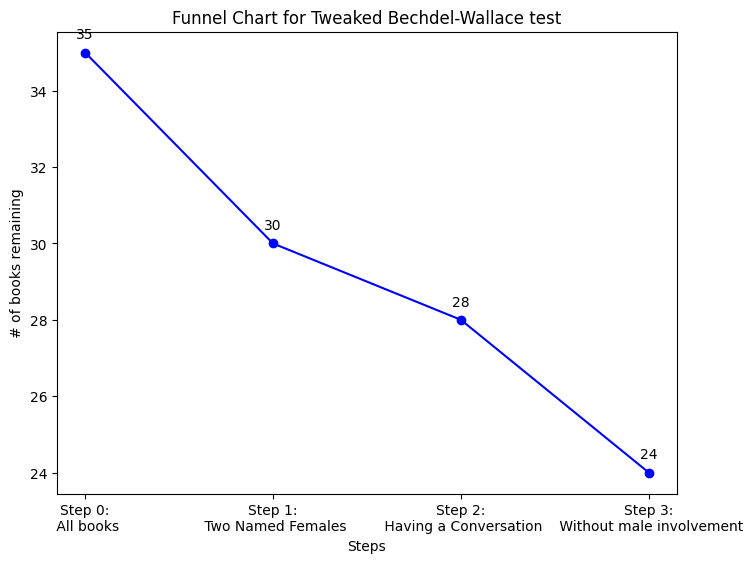

In [69]:
# Funnel Step 0: All books
funnel_steps = [len(russian_19th_century_books_dict) + len(russian_20th_century_books_dict) + len(english_19th_century_books_dict) + len(english_20th_century_books_dict)]

# Funnel Step 1: All books with 2 named female characters
print("Books Removed during Step 1 - Two named female characters: ")
books_two_females = 0
# For each group of books, go through the characters and check if there are at least two named females in the character dictionary
# (From the previous gender question, a flag for male/female is present in the character list)
for name, chars in russian_19th_century_char_freq.items():
    true_count = 0
    for char in chars.keys():
        if russian_19th_century_char_gender_dict[name][char]:
            true_count += 1
    if true_count > 1:
        books_two_females += 1
    else:
        print(name)
for name, chars in russian_20th_century_char_freq.items():
    true_count = 0
    for char in chars.keys():
        if russian_20th_century_char_gender_dict[name][char]:
            true_count += 1
    if true_count > 1:
        books_two_females += 1
    else:
        print(name)
for name, chars in english_19th_century_char_freq.items():
    true_count = 0
    for char in chars.keys():
        if english_19th_century_char_gender_dict[name][char]:
            true_count += 1
    if true_count > 1:
        books_two_females += 1
    else:
        print(name)
for name, chars in english_20th_century_char_freq.items():
    true_count = 0
    for char in chars.keys():
        if english_20th_century_char_gender_dict[name][char]:
            true_count += 1
    if true_count > 1:
        books_two_females += 1
    else:
        print(name)
funnel_steps.append(books_two_females)

# Funnel step 2: Do the females interact without a man?
print("\n\nBooks Removed during Step 2 - Female-to-female interaction: ")
female_int_count = 0
# Review all the books in each group to see if there's a paragraph in which two females interact
for book_name, char_int in russian_19th_century_char_interactions.items():
    female_int = False
    for char_tuple in char_int.keys():
        if russian_19th_century_char_gender_dict[book_name][char_tuple[0]] and russian_19th_century_char_gender_dict[book_name][char_tuple[1]]:
            female_int = True
            break
    if female_int:
        female_int_count += 1
    else:
        print(book_name)
for book_name, char_int in russian_20th_century_char_interactions.items():
    female_int = False
    for char_tuple in char_int.keys():
        if russian_20th_century_char_gender_dict[book_name][char_tuple[0]] and russian_20th_century_char_gender_dict[book_name][char_tuple[1]]:
            female_int = True
            break
    if female_int:
        female_int_count += 1
    else:
        print(book_name)
for book_name, char_int in english_19th_century_char_interactions.items():
    female_int = False
    for char_tuple in char_int.keys():
        if english_19th_century_char_gender_dict[book_name][char_tuple[0]] and english_19th_century_char_gender_dict[book_name][char_tuple[1]]:
            female_int = True
            break
    if female_int:
        female_int_count += 1
    else:
        print(book_name)
for book_name, char_int in english_20th_century_char_interactions.items():
    female_int = False
    for char_tuple in char_int.keys():
        if english_20th_century_char_gender_dict[book_name][char_tuple[0]] and english_20th_century_char_gender_dict[book_name][char_tuple[1]]:
            female_int = True
            break
    if female_int:
        female_int_count += 1
    else:
        print(book_name)
funnel_steps.append(female_int_count)


#Step 3
# Confirm that there is no male involvement in the female interaction paragraphs
female_only_int_count = 0
print("\n\nFinal books selected:")
#Go over each book of each group
for book_name, char_list_dict in russian_19th_century_char_list_dict.items():
    female_int = False
    # Go over all the characters in each paragraph
    for char_list in char_list_dict.values():
        # If there's only one character, no point in checking
        if len(char_list) < 2:
            continue
        else:
            only_female = True
            # If there is more than one character, go over them and see if they are all female
            for char in char_list:
                if not russian_19th_century_char_gender_dict[book_name][char]:
                    only_female = False
            # If they are all female, then this book passes the test
            if only_female:
                female_only_int_count += 1
                print(book_name)
                break 
for book_name, char_list_dict in russian_20th_century_char_list_dict.items():
    female_int = False
    for char_list in char_list_dict.values():
        if len(char_list) < 2:
            continue
        else:
            only_female = True
            for char in char_list:
                if not russian_20th_century_char_gender_dict[book_name][char]:
                    only_female = False
            if only_female:
                female_only_int_count += 1
                print(book_name)
                break 
for book_name, char_list_dict in english_19th_century_char_list_dict.items():
    female_int = False
    for char_list in char_list_dict.values():
        if len(char_list) < 2:
            continue
        else:
            only_female = True
            for char in char_list:
                if not english_19th_century_char_gender_dict[book_name][char]:
                    only_female = False
            if only_female:
                female_only_int_count += 1
                print(book_name)
                break 
for book_name, char_list_dict in english_20th_century_char_list_dict.items():
    female_int = False
    for char_list in char_list_dict.values():
        if len(char_list) < 2:
            continue
        else:
            only_female = True
            for char in char_list:
                if not english_20th_century_char_gender_dict[book_name][char]:
                    only_female = False
            if only_female:
                female_only_int_count += 1
                print(book_name)
                break 
funnel_steps.append(female_only_int_count)

# Plot the funnel
plot_funnel(funnel_steps)

The results of this final test may be surprising. Of all books, some of which are almost 200 years old more than 2/3 passes the test. What may be less surprising is that, if we look at the books that are removed, they are all older books, mostly from the 19th century. On the other hand, there does not appear to be a significant difference between the number of Russian books versus English books removed from the list. This may be considered surprising, since Russia does not have the reputation for being a highly progressive country when it comes to female rights. This, however, possibly also shows one flaw in the test: while there may be two female characters in these stories discussing something other than a man, it does not mean that the females are necessarily treated properly. 

## Conclusion
As shown by this work, significant, large-scale literary analysis can be performed using data science, but not only that, this work can be made significantly more efficient through the use of new Large Language Models. The repeated use of various simple GPT prompts has enabled the generation of large datasets that help to streamline and refine the programmic analysis of literature. 

Using these methods I have shown that, with a not insignificant dataset of Russian and English literature from the 19th and 20th century it is possible to provide detailed results from objective cross-book comparison. Using basic statistics I have shown that many preconceptions of differences between the 19th and 20th century or between Russian and English literature may not be so obviously present as one might expect. For the most basic example, word count, there is no significant difference between the Russian and English literature, nor is there any for the 19th vs. 20th century books, even though we might have expected 20th century books to be clearly shorter. Where a significant difference was found was in the ratio of dialogue versus other text. Here, in particular, Russian literature from the 19th century stood out and included significantly more dialogue than any of the other groups analyzed. This extends to a difference between periods in general, with 19th century books including significantly more dialogue than 20th century books. Interestingly, no differences were found in terms of gender ratio between the different groups of books. 

As second example of analysis, I have created an interactive character map, showing all characters present in a story and their interaction patterns. Such maps, while slightly chaotic to non-experts, can be very helpful in understanding the intricasies of interactions between characters and the differences between stories, writers, regions or periods. As discussed by Bonato et al. (2016), such character maps can exhibit many properties of complex networks and can help look at works of literature from a new perspective. The simple large-scale generation of these networks with the help of GPT can introduce new modes of analysis in the field of Literature.

A third and final part of the analysis goes into a Tweaked Bechdel-Wallace test. This test, or at least a slightly tweaked version, for the representation of women in works of art can be programmatically tested using this input from GPT. As shown by the example above, from the 35 books tested, only 24 managed to pass the Tweaked Bechdel-Wallace test. The automation of this test used on a larger scale can also provide interesting insights in the progression of women in literature over time or across different regions.

To conclude, the use of GPT can be a valuable addition to the field of literature analysis. It opens up the door for large-scale structured analysis of literature using more objective measures that provide an alternative perspective from personal subjective interpretations. The project above gives an overview of various options one has when trying to perform such an analysis with the support of GPT and the various test and visualizations that could be created. This can result in a better and interesting new perspective of cultural progression over time through the lens of literature.


## References
Emerson, C. (2008). *The Cambridge introduction to Russian literature.* Cambridge University Press.

Zhang, X. (2020). *Starter: Classic English Literature* | Kaggle. https://www.kaggle.com/code/raynardj/starter-classic-english-literature

Bonato, A., D’Angelo, D. R., Elenberg, E. R., Gleich, D. F., & Hou, Y. (2016). Mining and modeling character networks. Lecture Notes in Computer Science (Including Subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics), 10088 LNCS, 100–114. https://doi.org/10.1007/978-3-319-49787-7_9/COVER

Appel, M., & Gnambs, T. (2023). *Women in Fiction: Bechdel-Wallace Test Results for the Highest-Grossing Movies of the Last Four Decades.* Psychology of Popular Media, 12(4), 499. https://doi.org/10.1037/PPM0000436